In [1]:

import os
import sys
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from collections import defaultdict 



In [2]:
def remove_missing_data(df):
        for col in df.columns:
            try:
                df[col].replace({".": np.nan}, inplace=True)
            except Exception as e:
                print(e, "\n No missing values in", col)

        return df.dropna()


In [3]:

sys.path.append("../codes")

import utilities as util



# Load data

In [4]:

data_sets_xls = pd.ExcelFile("../data/IA_report.xlsx")

print(data_sets_xls.sheet_names)




['dyslexia', 'risk', 'norm']


In [7]:

    
data_sets = defaultdict(list)


for sheet in data_sets_xls.sheet_names:
    tmp =  pd.read_excel(data_sets_xls, sheet)
    tmp = remove_missing_data(df=tmp)
    tmp.replace({"norm": 1, "risk": 2, "dyslexia":3, }, inplace=True)
    tmp = tmp.astype({
        "Group": int,
        "SubjectID": str,
        "Sentence_ID":int, 
        "Word_Number": int, 
        "QUESTION_ACCURACY": int, 
        "FIXATION_COUNT": int, 
        "SKIP": int, 
        "TOTAL_READING_TIME": float, 
        "FIRST_FIXATION_DURATION": float,
        "FIRST_FIXATION_X": float, 
        "FIRST_FIXATION_Y": float, 
        "FIRST_RUN_TOTAL_READING_TIME": float, 
        "FIRST_SACCADE_AMPLITUDE": float, 
        "REGRESSION_IN": int, 
        "REGRESSION_OUT": int, 
        "REGRESSION_OUT_FULL": int, 
        "REGRESSION_PATH_DURATION": float,         
        })  

    data_sets[sheet] = tmp.sort_values(by=["SubjectID", "Sentence_ID", "Word_Number"]).dropna()

    print(sheet, tmp.shape)

    

dyslexia (12641, 17)
risk (4148, 17)
norm (39622, 17)



## Remove the duplicated users from normal data



In [9]:


# duplicated_subjects = {'m29', 'm47', 's163', 's180'}


# tmp_norm = data_sets["norm"]

# norm_new = tmp_norm.loc[~tmp_norm.SubjectID.isin(duplicated_subjects)]


# print(norm_new.shape, data_sets["norm"].shape)


# data_sets["norm"] = norm_new



# with pd.ExcelWriter('../data/IA_report.xlsx') as writer:
#     for k, v in data_sets.items():
#         v.to_excel(writer, sheet_name=k, index=False)




In [10]:

data_sets["norm"].head()



Group SubjectID  Sentence_ID  Word_Number  QUESTION_ACCURACY  \
40333      1        10            4            2                  1   
40334      1        10            4            3                  1   
40335      1        10            4            4                  1   
40336      1        10            4            5                  1   
40337      1        10            4            6                  1   

       FIXATION_COUNT  SKIP  TOTAL_READING_TIME  FIRST_FIXATION_DURATION  \
40333               1     0               247.0                    247.0   
40334               1     0               261.0                    261.0   
40335               2     0               397.0                    268.0   
40336               2     0               354.0                    140.0   
40337               2     0               183.0                    134.0   

       FIRST_FIXATION_X  FIRST_FIXATION_Y  FIRST_RUN_TOTAL_READING_TIME  \
40333             200.5             545.2                         247.0   
40334             282.7             542.4                         261.0   
40335             358.1             545.5                         397.0   
40336             592.7             532.1                         354.0   
40337             732.2             526.9                         183.0   

       FIRST_SACCADE_AMPLITUDE  REGRESSION_IN  REGRESSION_OUT  \
40333                     0.89              0               0   
40334                     2.46              0               0   
40335                     1.82              0               0   
40336                     5.81              0               0   
40337                     4.74              0               0   

       REGRESSION_OUT_FULL  REGRESSION_PATH_DURATION  
40333                    0                     247.0  
40334                    0                     261.0  
40335                    0                     397.0  
40336                    0                     354.0  
40337                    0                     183.0

In [11]:


data_sets["norm"]



Group    SubjectID  Sentence_ID  Word_Number  QUESTION_ACCURACY  \
40333      1           10            4            2                  1   
40334      1           10            4            3                  1   
40335      1           10            4            4                  1   
40336      1           10            4            5                  1   
40337      1           10            4            6                  1   
...      ...          ...          ...          ...                ...   
50148      1  varya_norm1           32            5                  1   
50149      1  varya_norm1           32            6                  1   
49989      1  varya_norm1           33            3                 -1   
49990      1  varya_norm1           33            4                 -1   
49991      1  varya_norm1           33            5                 -1   

       FIXATION_COUNT  SKIP  TOTAL_READING_TIME  FIRST_FIXATION_DURATION  \
40333               1     0               247.0                    247.0   
40334               1     0               261.0                    261.0   
40335               2     0               397.0                    268.0   
40336               2     0               354.0                    140.0   
40337               2     0               183.0                    134.0   
...               ...   ...                 ...                      ...   
50148               1     0               243.0                    243.0   
50149               3     0              1402.0                    538.0   
49989               2     0              1100.0                    586.0   
49990               6     0              2607.0                   1010.0   
49991               5     0              1244.0                    563.0   

       FIRST_FIXATION_X  FIRST_FIXATION_Y  FIRST_RUN_TOTAL_READING_TIME  \
40333             200.5             545.2                         247.0   
40334             282.7             542.4                         261.0   
40335             358.1             545.5                         397.0   
40336             592.7             532.1                         354.0   
40337             732.2             526.9                         183.0   
...                 ...               ...                           ...   
50148             757.2             556.1                         243.0   
50149             781.2             559.7                        1402.0   
49989             429.1             536.9                        1100.0   
49990             522.3             529.0                        2607.0   
49991             739.0             529.9                        1244.0   

       FIRST_SACCADE_AMPLITUDE  REGRESSION_IN  REGRESSION_OUT  \
40333                     0.89              0               0   
40334                     2.46              0               0   
40335                     1.82              0               0   
40336                     5.81              0               0   
40337                     4.74              0               0   
...                        ...            ...             ...   
50148                     0.61              0               0   
50149                     0.66              0               1   
49989                     1.60              0               0   
49990                     1.23              0               0   
49991                     1.60              0               0   

       REGRESSION_OUT_FULL  REGRESSION_PATH_DURATION  
40333                    0                     247.0  
40334                    0                     261.0  
40335                    0                     397.0  
40336                    0                     354.0  
40337                    0                     183.0  
...                    ...                       ...  
50148                    0                     243.0  
50149                    1                    2711.0  
49989                    0  

In [12]:

data_sets["dyslexia"].head()



Group SubjectID  Sentence_ID  Word_Number  QUESTION_ACCURACY  \
2061      3     ake05            4            2                  1   
2062      3     ake05            4            3                  1   
2063      3     ake05            4            4                  1   
2064      3     ake05            4            5                  1   
2065      3     ake05            4            6                  1   

      FIXATION_COUNT  SKIP  TOTAL_READING_TIME  FIRST_FIXATION_DURATION  \
2061               4     0              1256.0                    420.0   
2062               2     0               540.0                    206.0   
2063               3     0              1986.0                   1071.0   
2064               9     0              4631.0                    743.0   
2065               1     0               564.0                    564.0   

      FIRST_FIXATION_X  FIRST_FIXATION_Y  FIRST_RUN_TOTAL_READING_TIME  \
2061             201.8             562.7                         420.0   
2062             275.5             561.2                         206.0   
2063             356.2             559.8                        1986.0   
2064             511.4             562.2                        1435.0   
2065             748.1             564.7                         564.0   

      FIRST_SACCADE_AMPLITUDE  REGRESSION_IN  REGRESSION_OUT  \
2061                     0.91              1               1   
2062                     1.30              0               1   
2063                     1.55              0               0   
2064                     1.05              0               0   
2065                     1.81              0               0   

      REGRESSION_OUT_FULL  REGRESSION_PATH_DURATION  
2061                    1                     881.0  
2062                    1                    1077.0  
2063                    0                    1986.0  
2064                    0                    4631.0  
2065                    0                     564.0

In [13]:

data_sets["risk"].head()



Group SubjectID  Sentence_ID  Word_Number  QUESTION_ACCURACY  \
1314      2      m107            4            2                  1   
1315      2      m107            4            3                  1   
1316      2      m107            4            4                  1   
1317      2      m107            4            5                  1   
1318      2      m107            4            6                  1   

      FIXATION_COUNT  SKIP  TOTAL_READING_TIME  FIRST_FIXATION_DURATION  \
1314               3     0               599.0                    222.0   
1315               1     0               178.0                    178.0   
1316               3     0               632.0                    162.0   
1317               2     0               568.0                    167.0   
1318               1     0               259.0                    259.0   

      FIRST_FIXATION_X  FIRST_FIXATION_Y  FIRST_RUN_TOTAL_READING_TIME  \
1314             225.0             572.7                         599.0   
1315             323.5             561.6                         178.0   
1316             391.1             555.6                         162.0   
1317             623.8             553.6                         568.0   
1318             732.4             545.1                         259.0   

      FIRST_SACCADE_AMPLITUDE  REGRESSION_IN  REGRESSION_OUT  \
1314                     1.23              0               0   
1315                     1.04              0               0   
1316                     1.47              0               0   
1317                     4.72              0               0   
1318                     4.01              0               0   

      REGRESSION_OUT_FULL  REGRESSION_PATH_DURATION  
1314                    0                     599.0  
1315                    0                     178.0  
1316                    0                     632.0  
1317                    0                     568.0  
1318                    0                     259.0

In [14]:


data_dyslexia_cols = data_sets["dyslexia"].columns
data_norm_cols = data_sets["norm"].columns
data_risk_cols = data_sets["risk"].columns




In [15]:

set(data_dyslexia_cols == data_norm_cols)



{True}

In [16]:

set(data_norm_cols == data_risk_cols)



{True}

In [17]:

data = pd.concat([v for k, v in data_sets.items()], axis=0)
data.shape



(55690, 17)

In [18]:

data.head()



Group SubjectID  Sentence_ID  Word_Number  QUESTION_ACCURACY  \
2061      3     ake05            4            2                  1   
2062      3     ake05            4            3                  1   
2063      3     ake05            4            4                  1   
2064      3     ake05            4            5                  1   
2065      3     ake05            4            6                  1   

      FIXATION_COUNT  SKIP  TOTAL_READING_TIME  FIRST_FIXATION_DURATION  \
2061               4     0              1256.0                    420.0   
2062               2     0               540.0                    206.0   
2063               3     0              1986.0                   1071.0   
2064               9     0              4631.0                    743.0   
2065               1     0               564.0                    564.0   

      FIRST_FIXATION_X  FIRST_FIXATION_Y  FIRST_RUN_TOTAL_READING_TIME  \
2061             201.8             562.7                         420.0   
2062             275.5             561.2                         206.0   
2063             356.2             559.8                        1986.0   
2064             511.4             562.2                        1435.0   
2065             748.1             564.7                         564.0   

      FIRST_SACCADE_AMPLITUDE  REGRESSION_IN  REGRESSION_OUT  \
2061                     0.91              1               1   
2062                     1.30              0               1   
2063                     1.55              0               0   
2064                     1.05              0               0   
2065                     1.81              0               0   

      REGRESSION_OUT_FULL  REGRESSION_PATH_DURATION  
2061                    1                     881.0  
2062                    1                    1077.0  
2063                    0                    1986.0  
2064                    0                    4631.0  
2065                    0                     564.0

In [19]:


set(data.columns == data_dyslexia_cols)



{True}

In [20]:

# pd.get_dummies(data, columns=["Sex"])



In [21]:

# dyslexia = data.loc[data["Group"]=="dyslexia"]

# dyslexia = data_sets["dyslexia"]



In [22]:
def plot_pies(data, col, labels):
    
    fig = plt.figure(figsize=(20, 10))
    ctr = 1
    for k, v in data.items():
        ax = fig.add_subplot(1, 3, ctr)  # three datasets
        x = [len(v[col].loc[v[col]==f]) for f in set(v[col])]
        if not labels:
            labels = set(v[col])
            patches, texts, autotexts = ax.pie(x=x, 
                                               labels=labels,
                                               autopct='%.2f', 
                                               textprops={'fontsize': 8},
                                              )
            labels = None
        else:   
            patches, texts, autotexts = ax.pie(x=x, 
                                               labels=labels, 
                                               autopct='%.2f', 
                                               textprops={'fontsize': 8}
                                              )
            
        plt.title(k, fontsize=20)
        ctr += 1
    plt.show()


    return None
    

In [23]:

# # Gender percentage: 
# plot_pies(data=data_sets, col="Sentence_ID", labels=None)




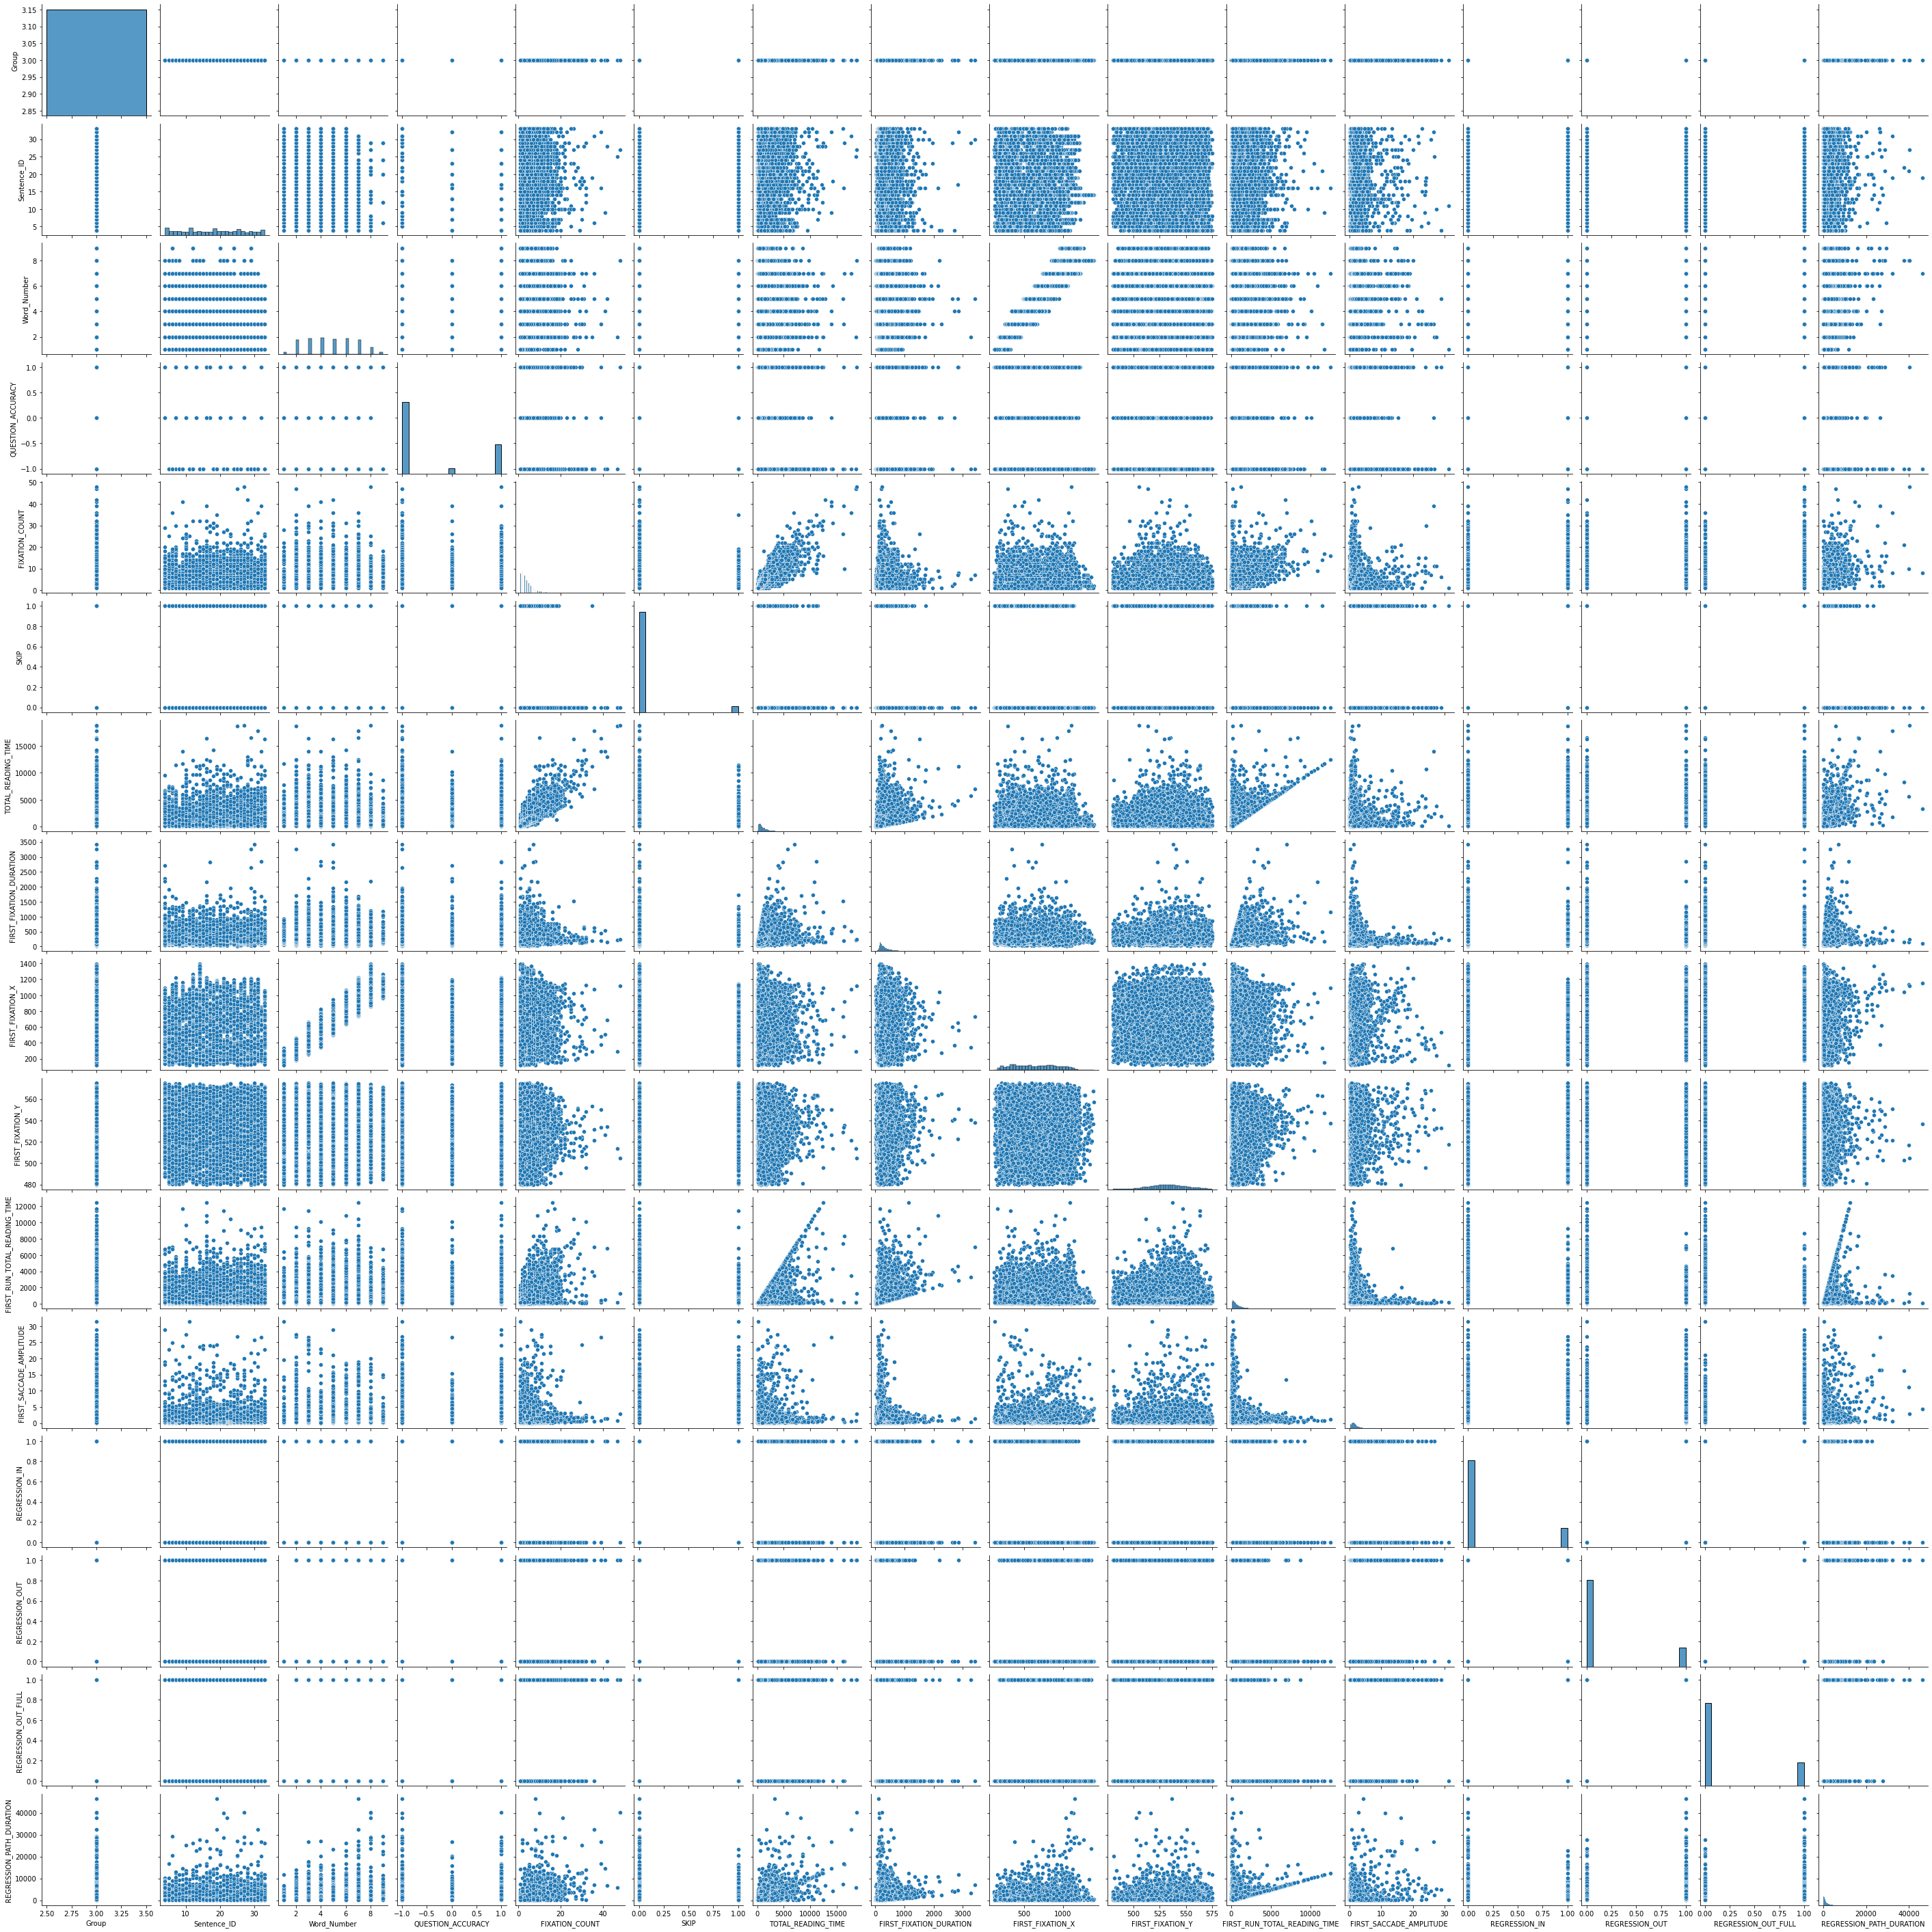

In [24]:

# Dyslexia pairplots:
sns.pairplot(data=data_sets["dyslexia"], )
plt.show()
    
    




- No linear correlation between any two pairs of the features


- Features distribution could be important 


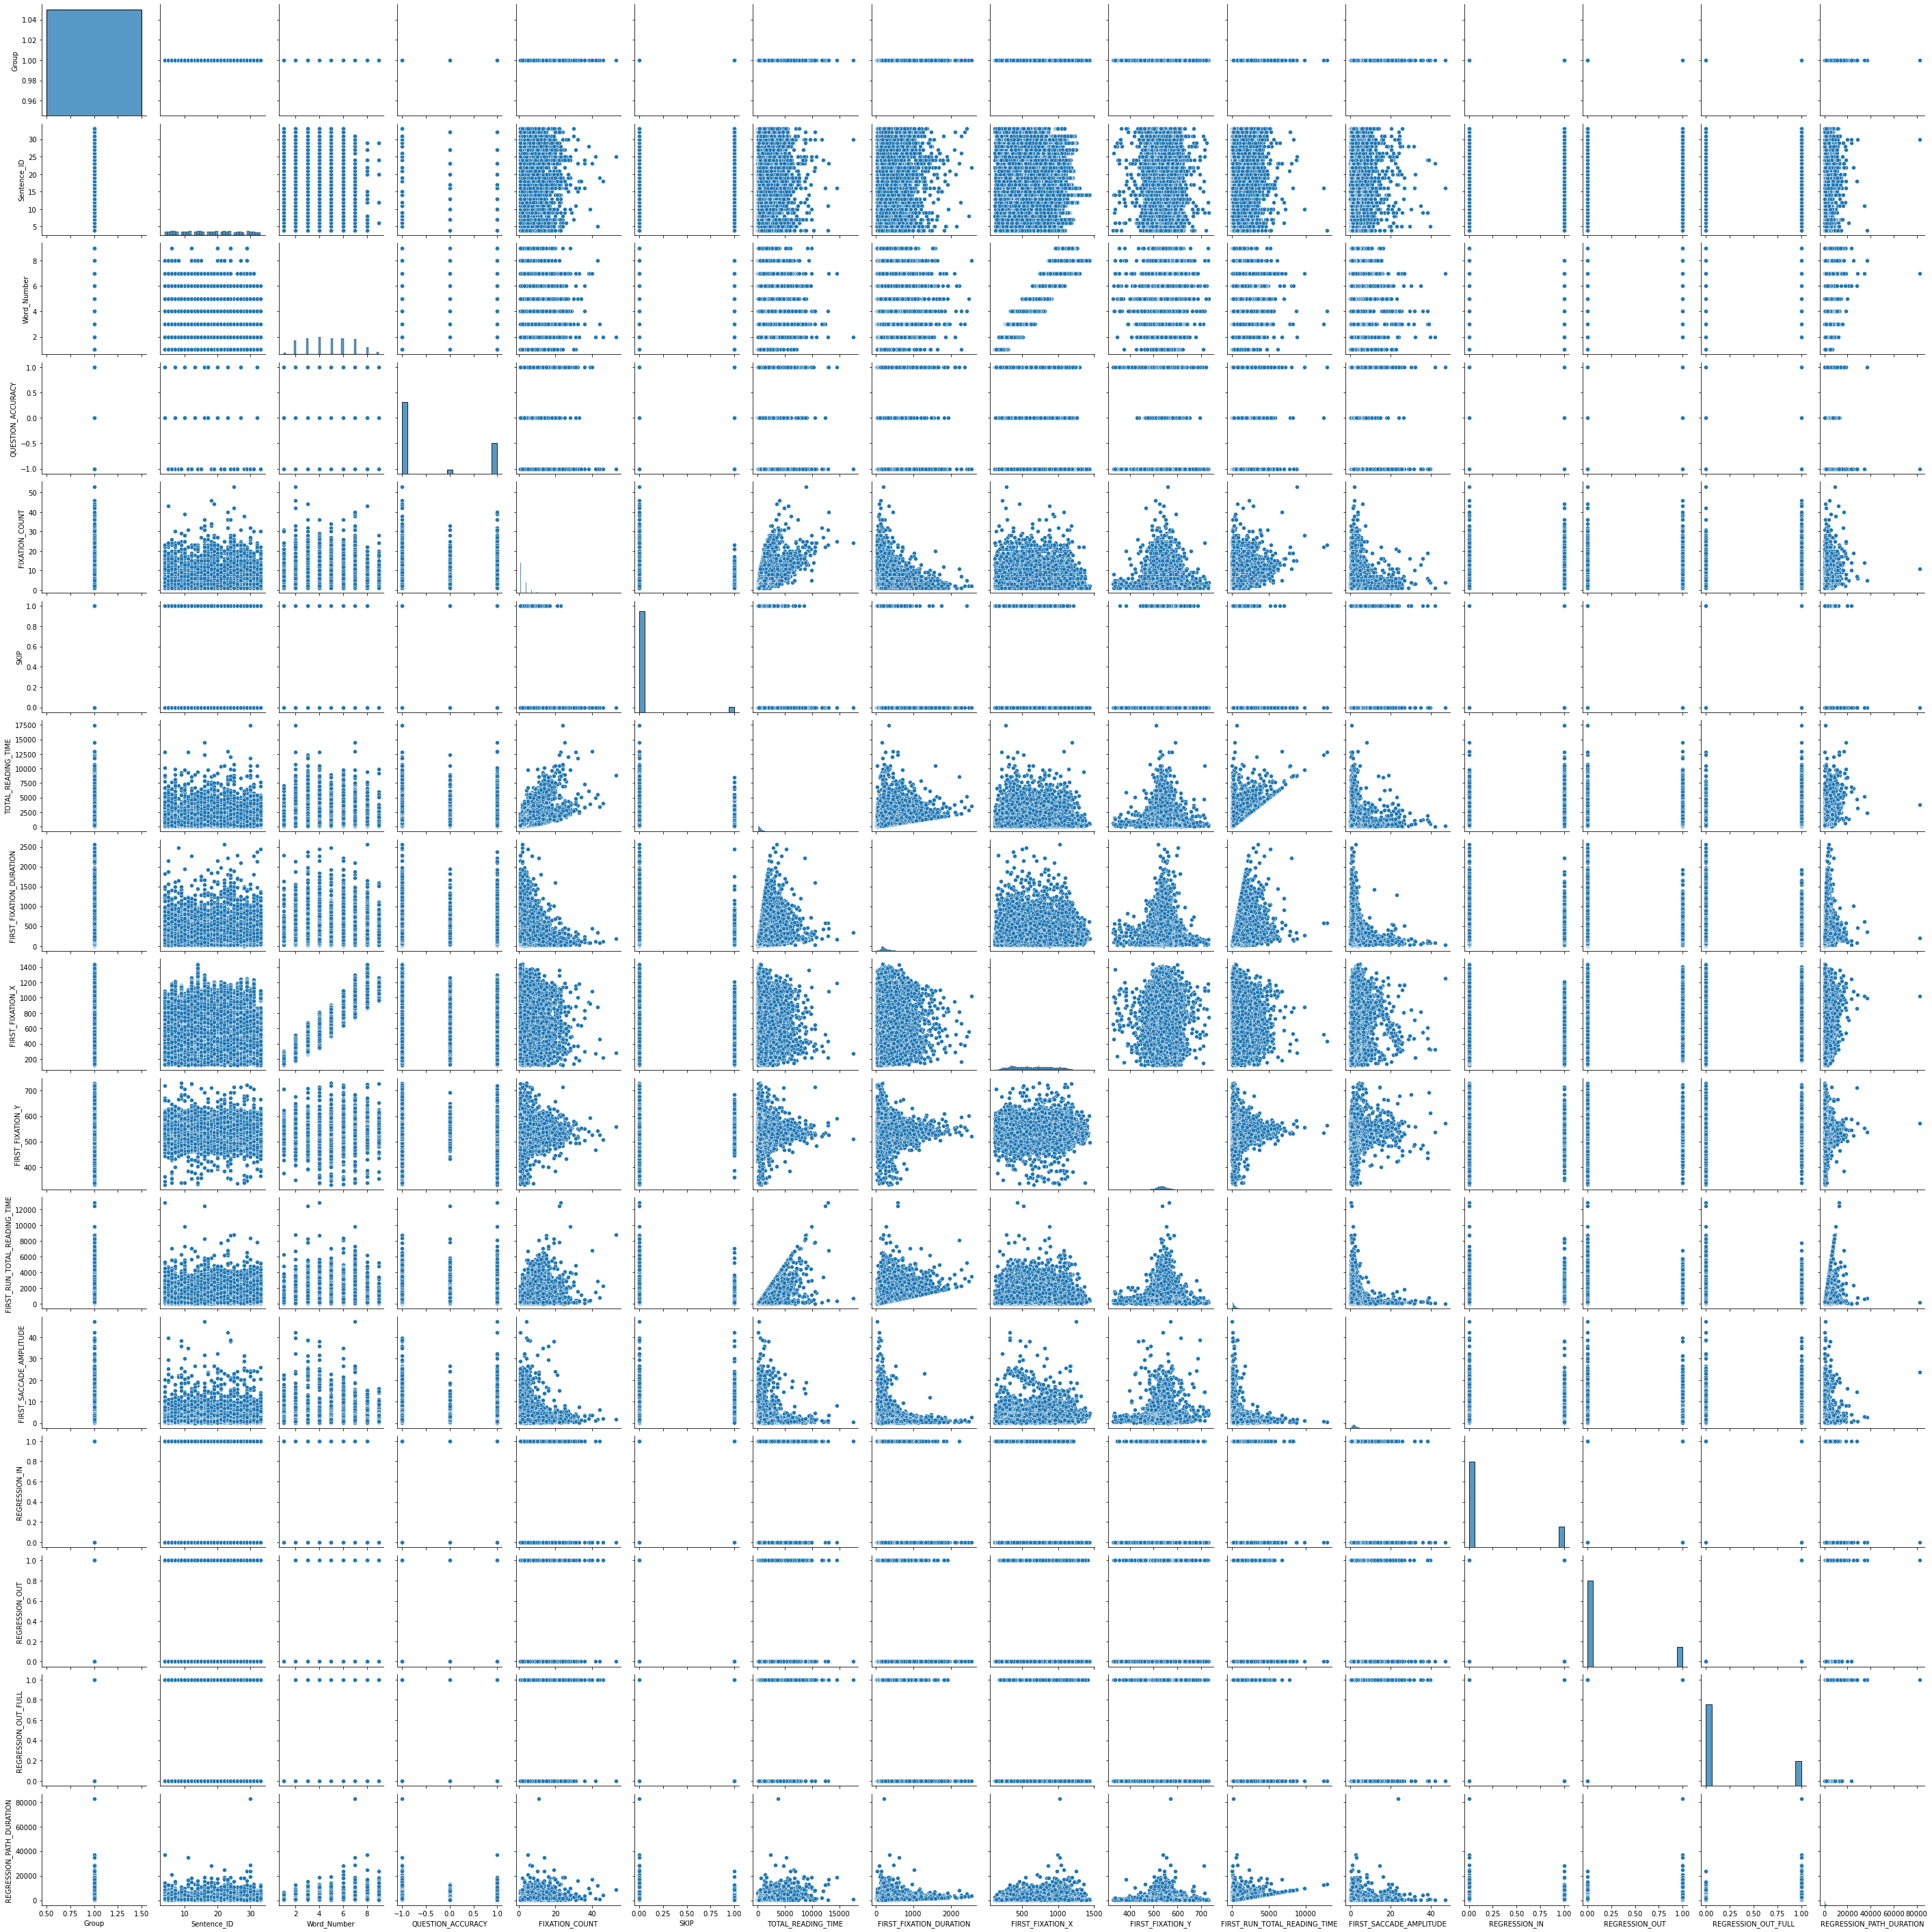

In [25]:

# Normal data pair-plots
sns.pairplot(data=data_sets["norm"], )
plt.show()





- No linear correlation between any two pairs of the features


- Features distribution could be important 



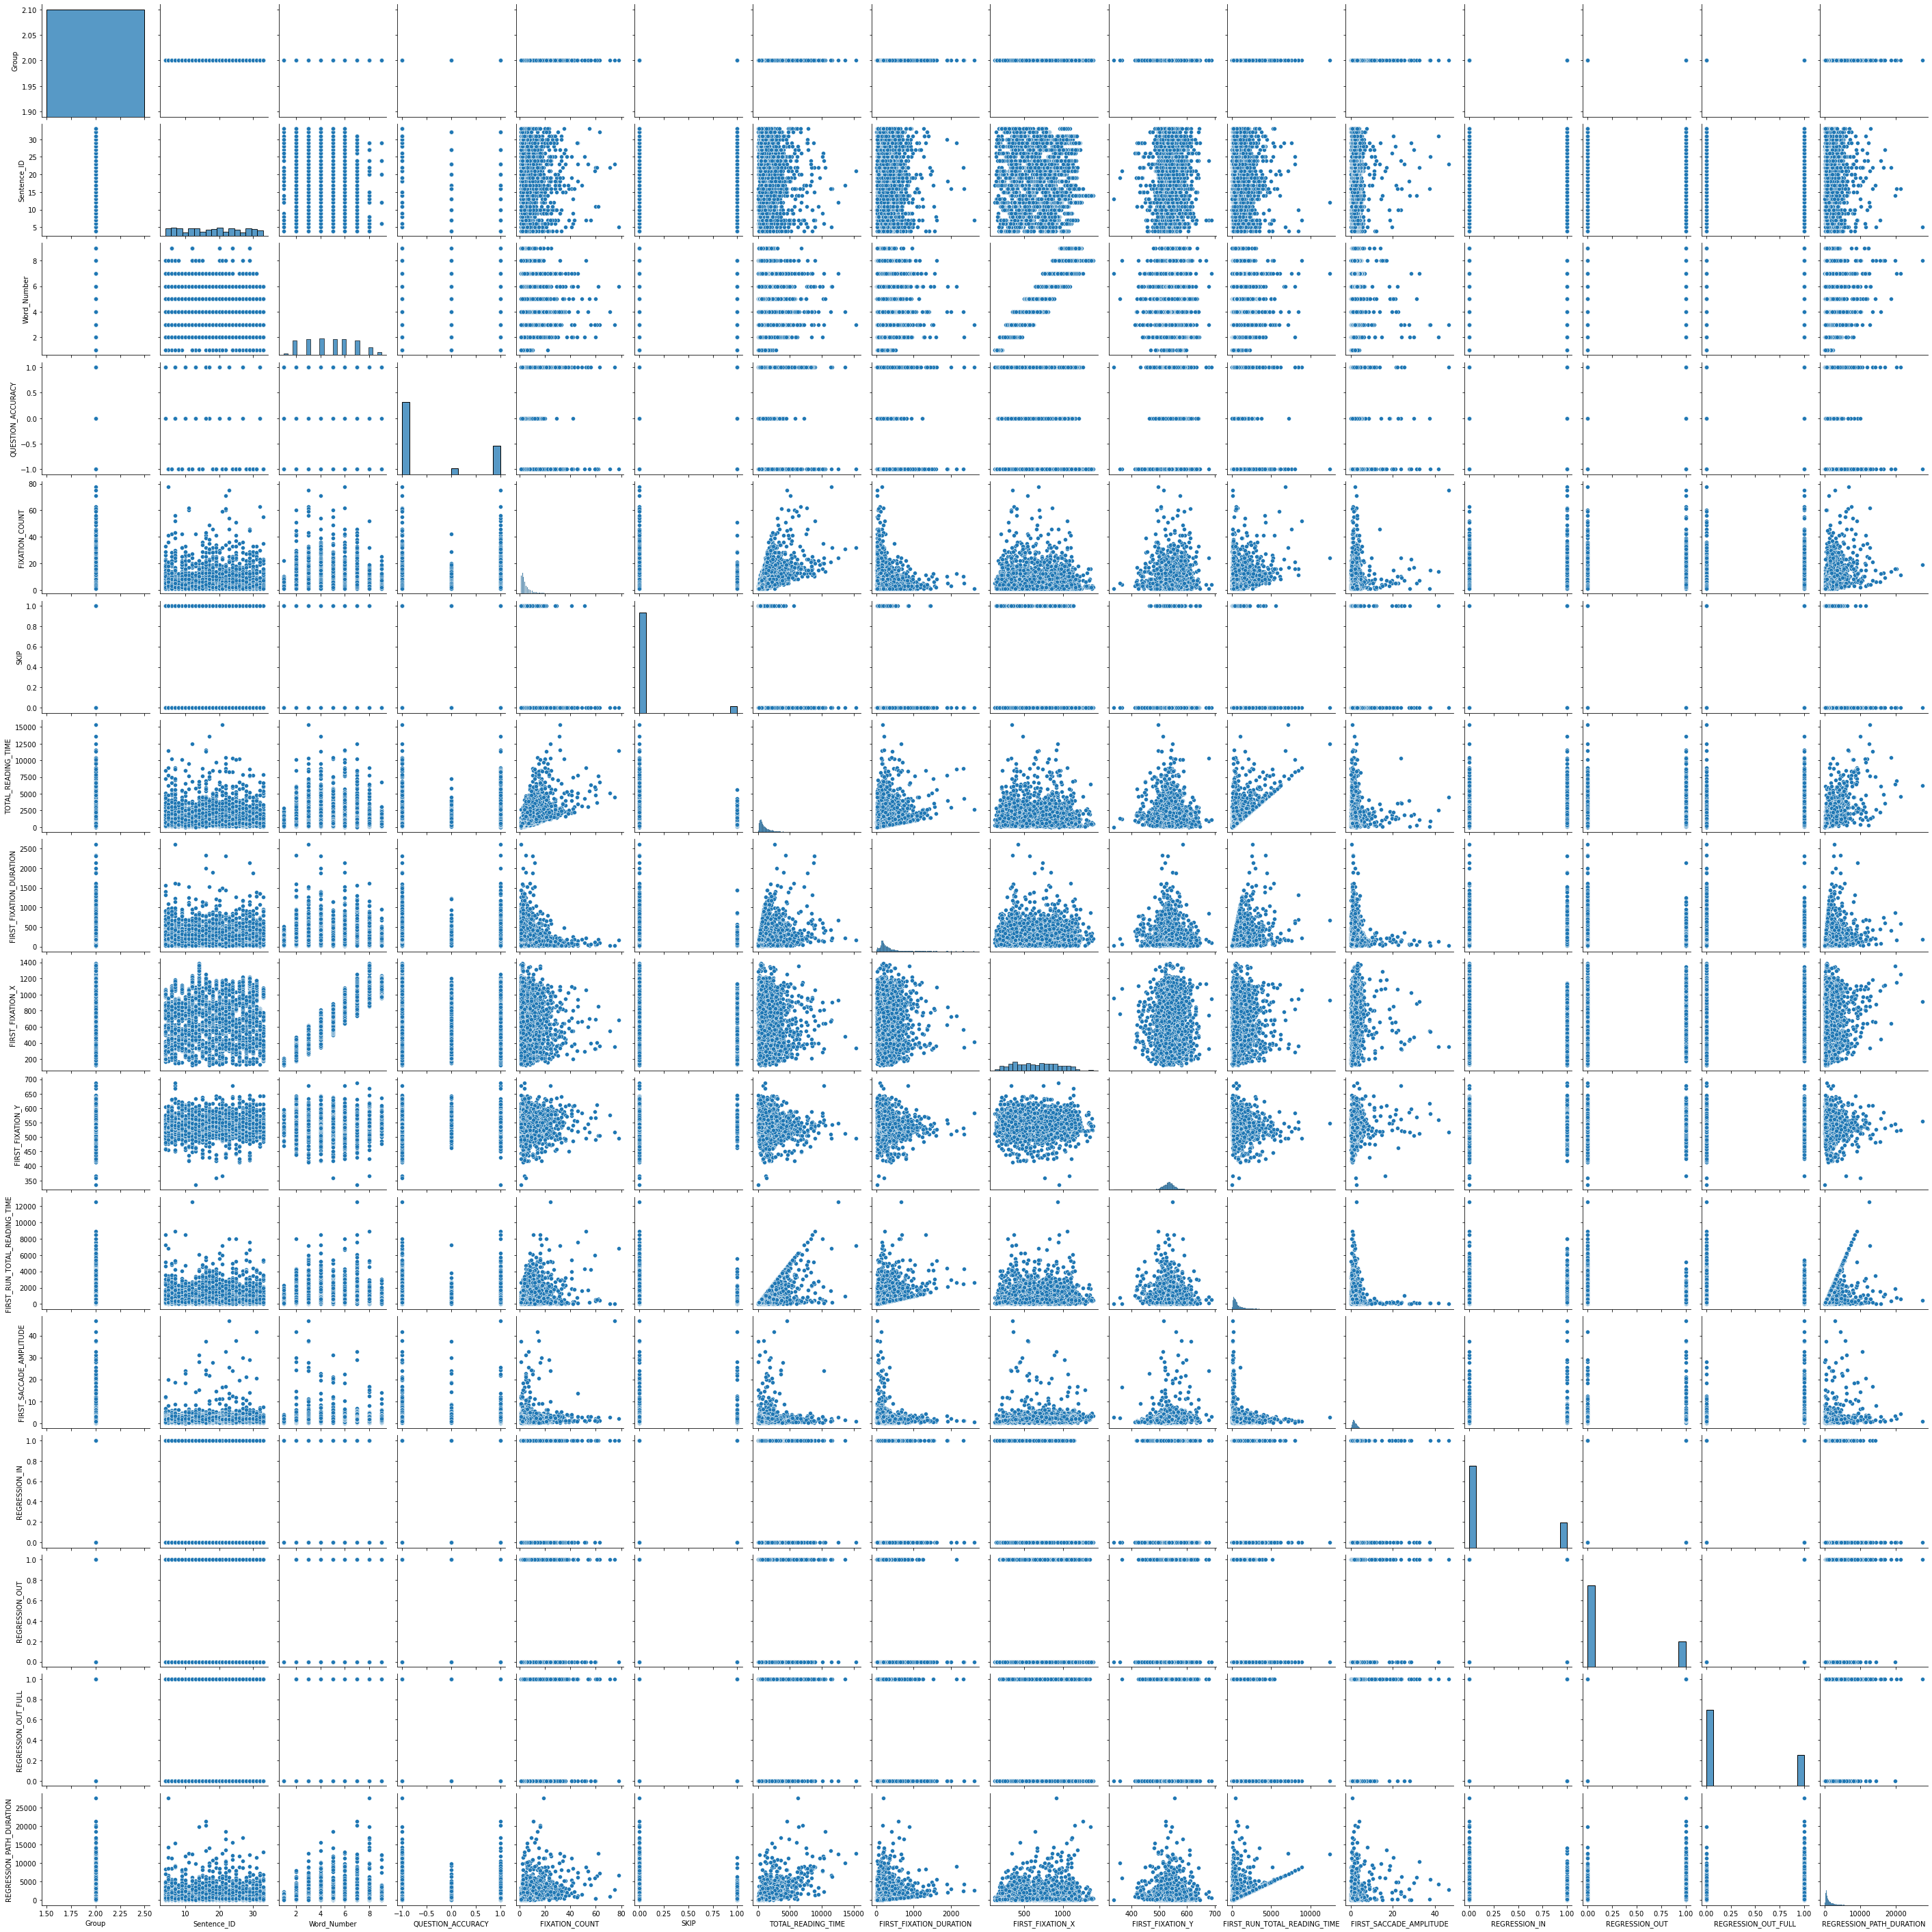

In [26]:


sns.pairplot(data=data_sets["risk"], )
plt.show()





- No linear correlation between any two pairs of the features

- features distribution could be important 




# Per Features plots

In [27]:
def plot_bars(data, col, x_label, y_label):
    
    fig = plt.figure(figsize=(17, 7))
    ax = fig.add_subplot(1, 1, 1)  # three datasets


    xs, heights, titles = [], [], []

    for k, v in data.items():
        titles.append(k)
        x = np.asarray([len(v[col].loc[v[col]==f]) for f in set(v[col])])
        x = np.divide(x, x.sum())
        heights.append(x)
        labels = set(v[col])

        xs.append(np.arange(4, len(labels)+4))


    ax.bar(x=xs[0],
           height=heights[0],
           color="r",
           alpha=0.9
          )


    ax.bar(x=xs[1],  
           height=heights[1],
           color="y",
           alpha=0.6,
          )

    ax.bar(x=xs[2],  
           height=heights[2],
           color="g",
           alpha=0.3
          )



    plt.xlabel(x_label, fontsize=10)
    plt.ylabel(y_label, fontsize=12)

    plt.legend(titles)

    plt.show()
    
    
    return None



    
    

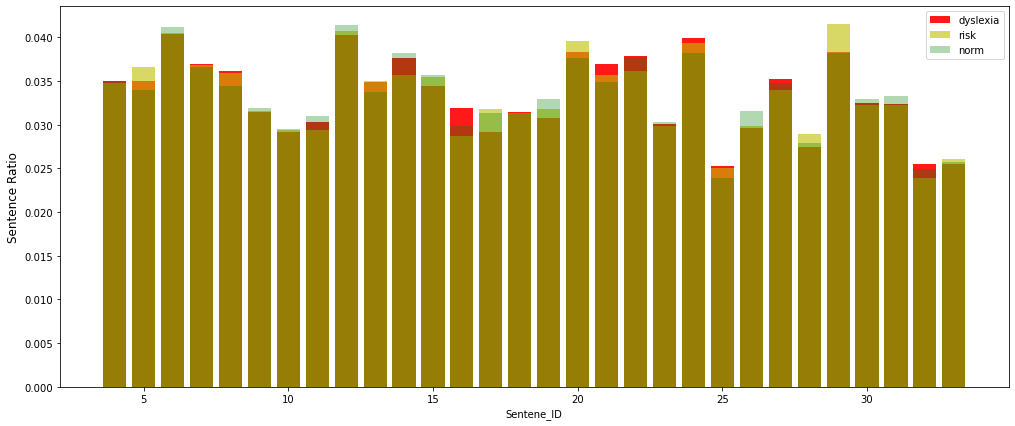

In [28]:


plot_bars(data=data_sets, col="Sentence_ID",
          x_label="Sentene_ID", 
          y_label="Sentence Ratio")




- Despite having fewer dyslexic/ at-risk participants, most of the sentences' ratio is higher than the normal group, which shows that these two groups repeated reading more sentences.
    
    - However, there sentences, in which normal participants repeated some sentences more (though it might be due to larger number of participants).



In [29]:
def plot_hists(data, col):
    
    colors = ["r", "y", "g"]
    fig = plt.figure(figsize=(20, 9))
    ctr = 1 
    for k, v in data.items():
        ax = fig.add_subplot(1, 3, ctr)  # three datasets
        x = v[col].values
        bins = np.linspace(x.min(), x.max(), 40)
        ax.hist(x=x, bins=bins, color=colors[ctr-1])
        ax.set_title(k, fontsize=16)
        ctr += 1

    fig.suptitle(col + " Distributions", fontsize=19)
    plt.show()
    
    return None

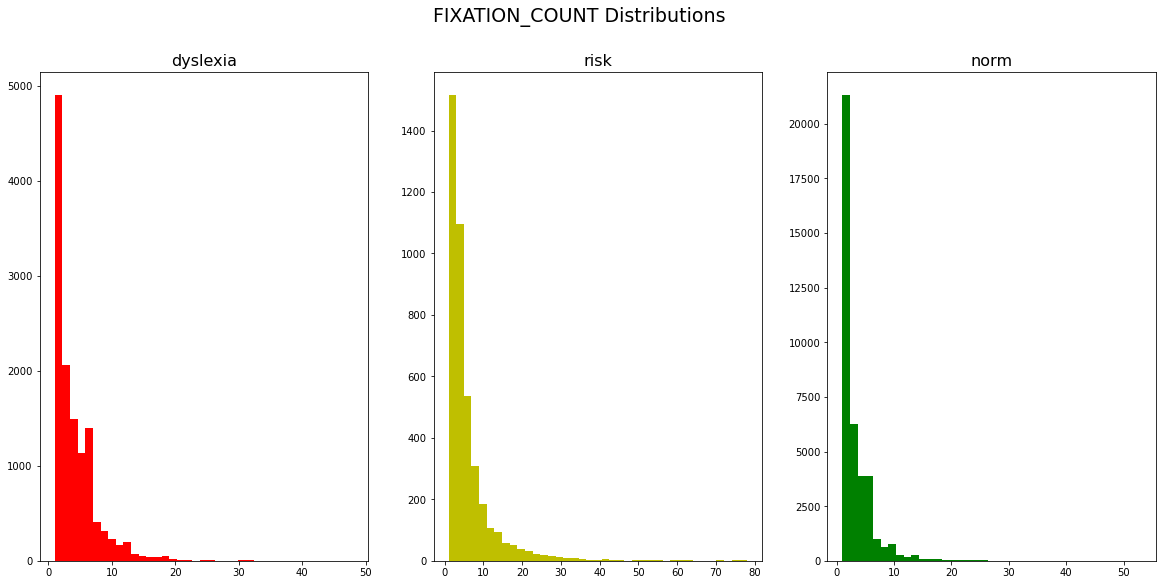

In [30]:


plot_hists(data=data_sets, col="FIXATION_COUNT")



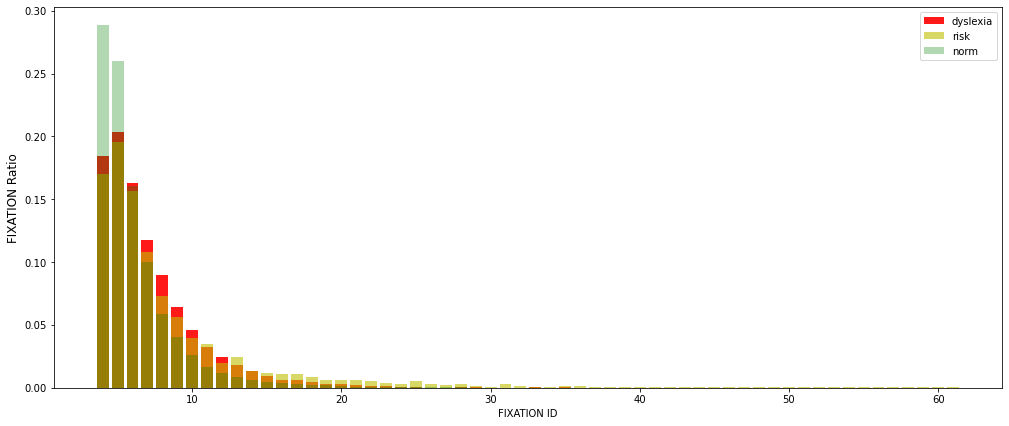

In [31]:

plot_bars(data=data_sets, 
          col="FIXATION_COUNT",
          x_label="FIXATION ID", 
          y_label="FIXATION Ratio")



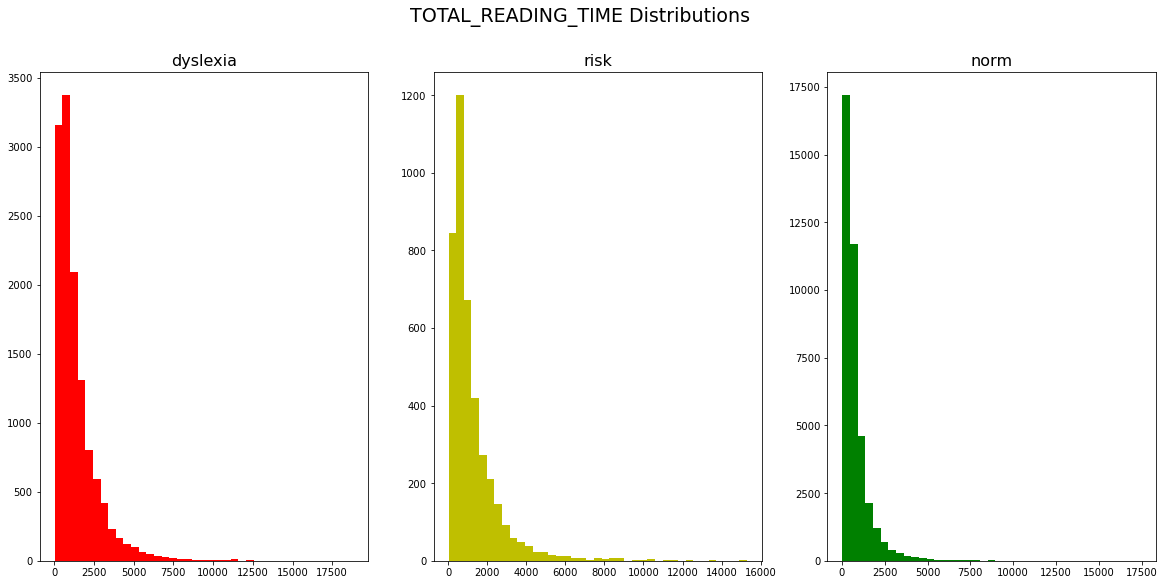

In [32]:


plot_hists(data=data_sets, col="TOTAL_READING_TIME")



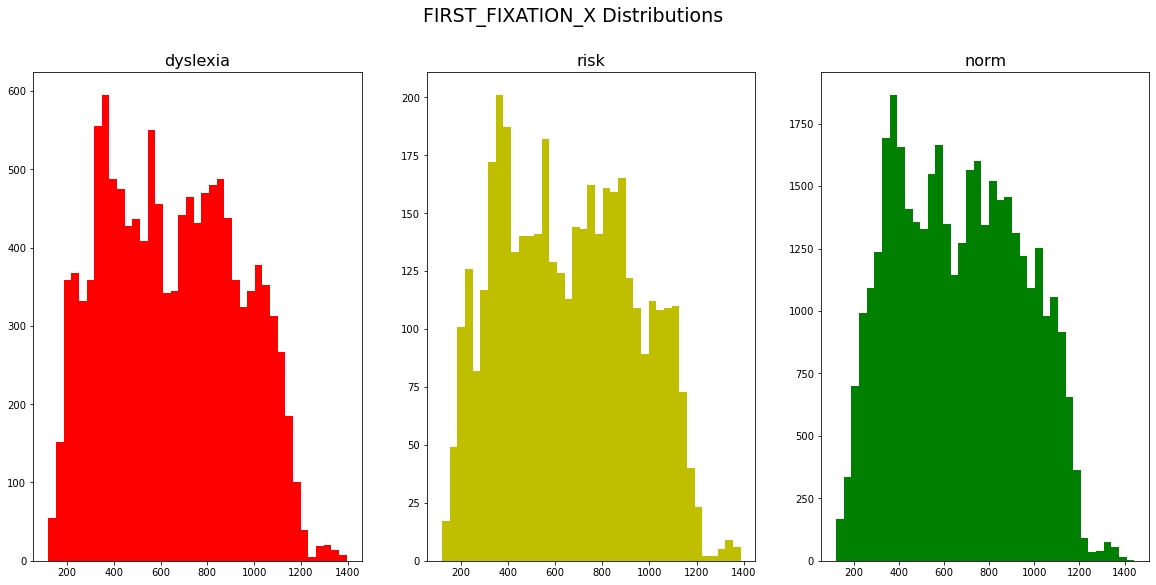

In [33]:


plot_hists(data=data_sets, col="FIRST_FIXATION_X")

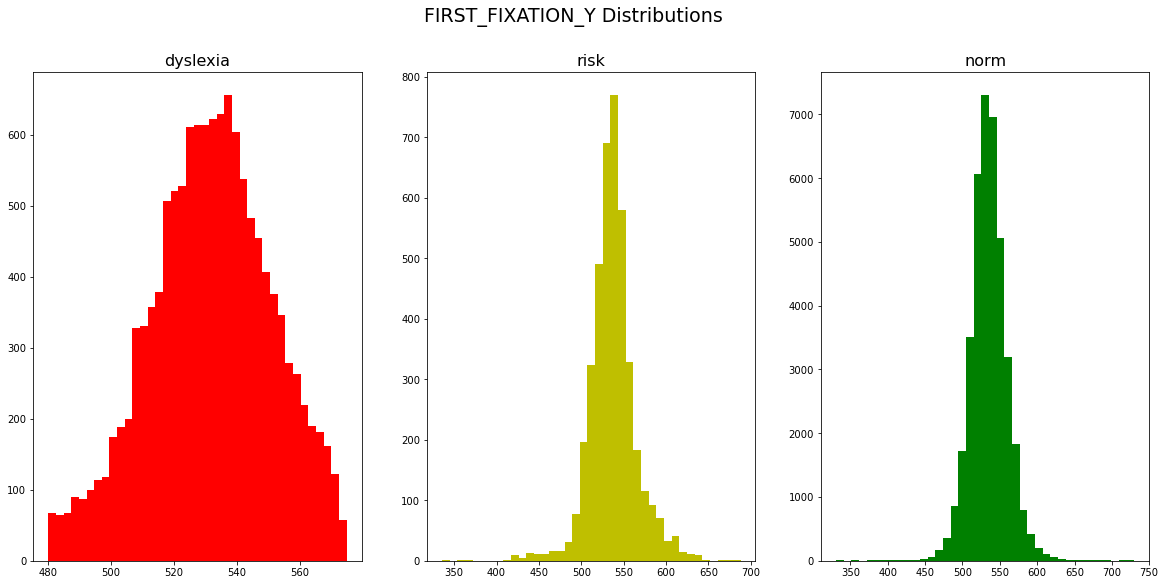

In [34]:


plot_hists(data=data_sets, col="FIRST_FIXATION_Y")






- It seems the major difference between dyslexic and other classes is in the fixation along Y coordinates.



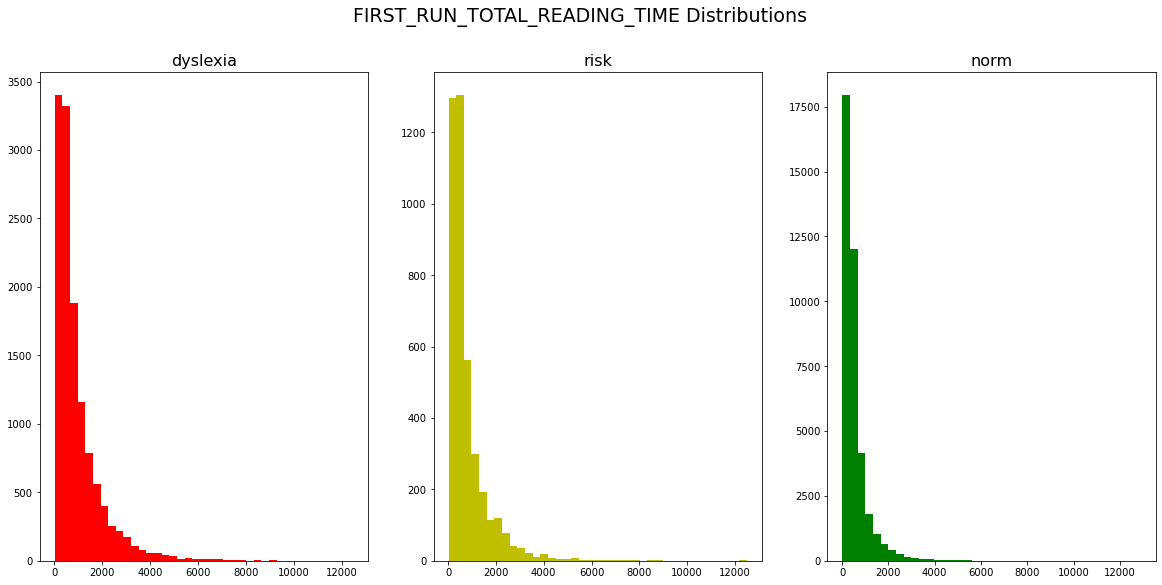

In [35]:


plot_hists(data=data_sets, col="FIRST_RUN_TOTAL_READING_TIME")



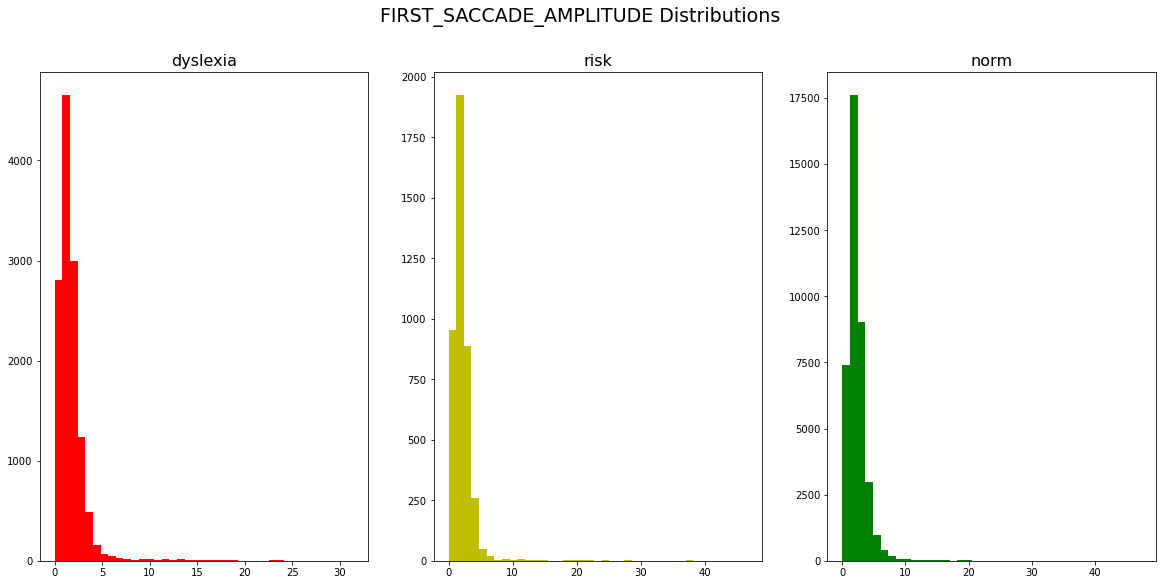

In [36]:


plot_hists(data=data_sets, col="FIRST_SACCADE_AMPLITUDE")





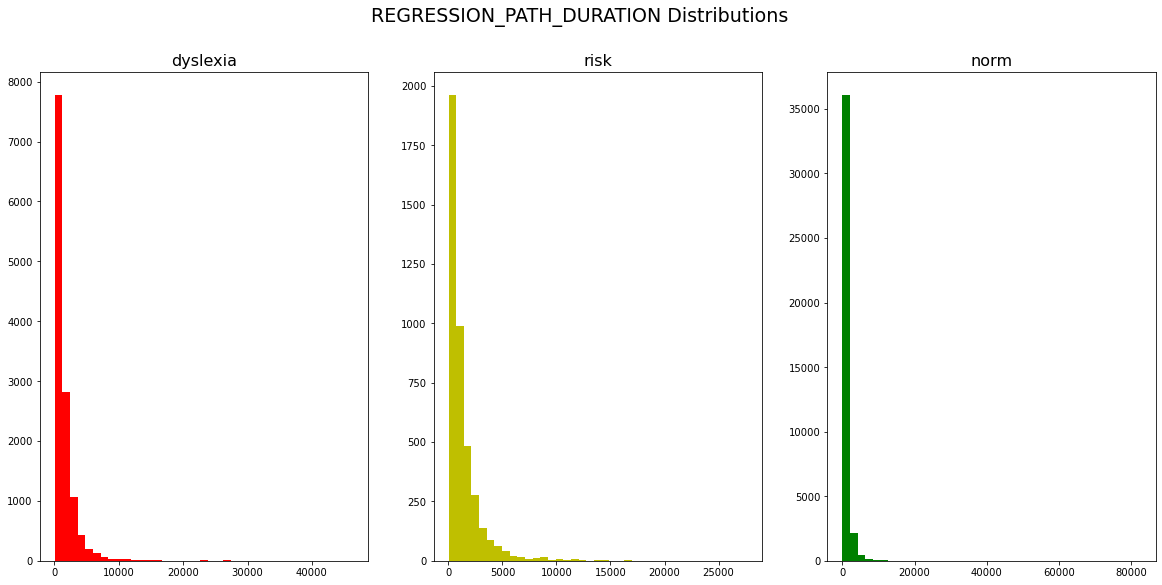

In [37]:

plot_hists(data=data_sets, col="REGRESSION_PATH_DURATION")


# Plotting per word number 

In [38]:

def plot_per_sentence_per_user(data, sentence, norm_users, risk_users, dyslexic_users, index):
    
    N = min(len(norm_users), len(risk_users), len(dyslexic_users))
        
    if index > N:
        print("index is larger that number of at risk or dyslexic users")        
    assert not index > N
    

    features = list(data.columns)[4:]

    yn = data.loc[(data["Sentence_ID"] == sentence) &
                  (data["SubjectID"] == norm_users[index])
                 ]
    xn = yn["Word_Number"]

    yr = data.loc[(data["Sentence_ID"] == sentence) & 
                  (data["SubjectID"] == risk_users[index])
                 ]
    xr = yr["Word_Number"]

    yd = data.loc[(data["Sentence_ID"] == sentence) & 
                  (data["SubjectID"] == dyslexic_users[index])
                 ]
    xd = yd["Word_Number"]



    for f in features:

        fig = plt.figure(figsize=(13, 3))
        ax = fig.add_subplot(1, 1, 1)  # three datasets
        plt.plot(xn, yn[f], "g-.", linewidth=4, )
        plt.plot(xr, yr[f], "y-+", linewidth=2, )
        plt.plot(xd, yd[f], "r-o", linewidth=1, )
        plt.xlabel("Word Number", fontsize=10)
        plt.ylabel(f, fontsize=9)

        plt.legend(["Norm", "Risk", "Dyslexia"])

    plt.show()
    
    return yn, yr, yd





In [39]:


sentences = np.unique(data.Sentence_ID)
norm_users = np.unique(data.loc[data["Group"]==1].loc[:, "SubjectID"])
risk_users = np.unique(data.loc[data["Group"]==2].loc[:, "SubjectID"])
dyslexic_users = np.unique(data.loc[data["Group"]==3].loc[:, "SubjectID"])



In [40]:

features = ["FIXATION_COUNT", 
            "TOTAL_READING_TIME", 
            "FIRST_FIXATION_DURATION",
            "FIRST_FIXATION_X", 
            "FIRST_FIXATION_Y",
            "FIRST_RUN_TOTAL_READING_TIME", 
            "FIRST_SACCADE_AMPLITUDE", 
            "REGRESSION_PATH_DURATION", 
           ]

features



['FIXATION_COUNT',
 'TOTAL_READING_TIME',
 'FIRST_FIXATION_DURATION',
 'FIRST_FIXATION_X',
 'FIRST_FIXATION_Y',
 'FIRST_RUN_TOTAL_READING_TIME',
 'FIRST_SACCADE_AMPLITUDE',
 'REGRESSION_PATH_DURATION']

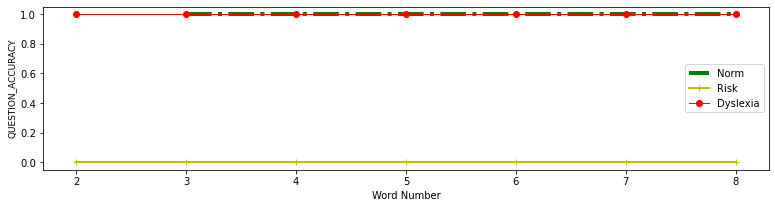

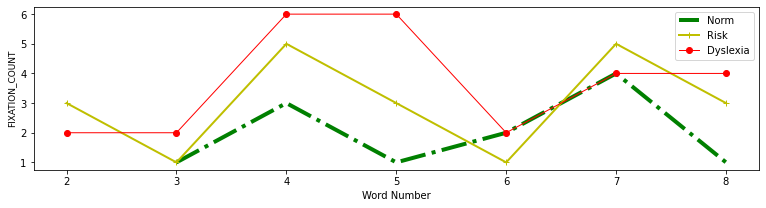

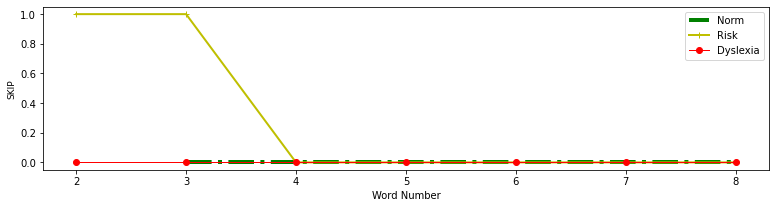

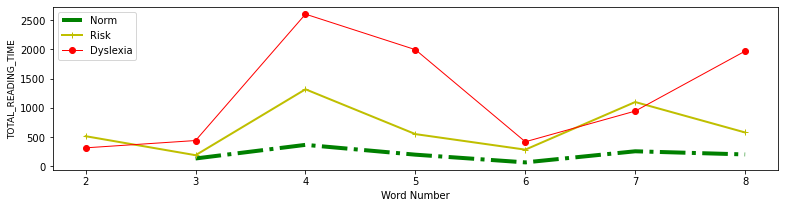

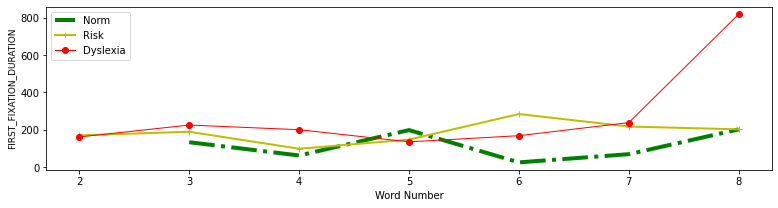

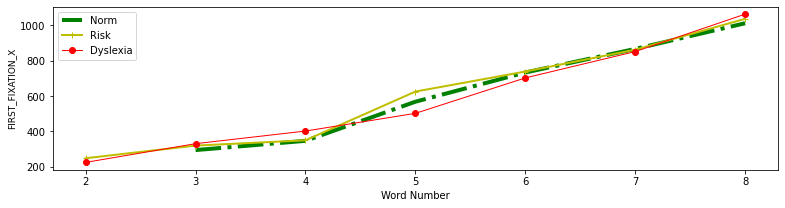

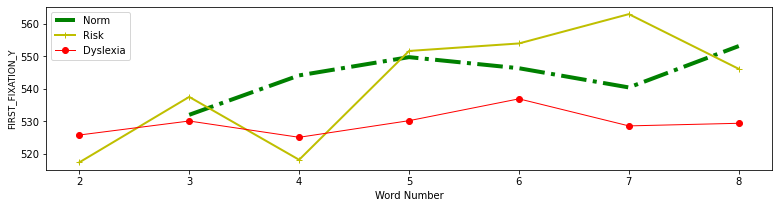

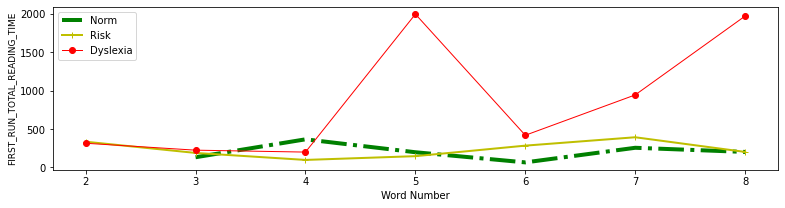

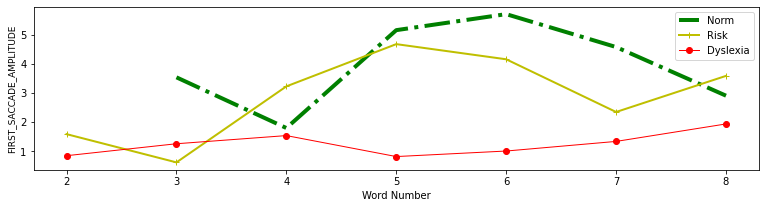

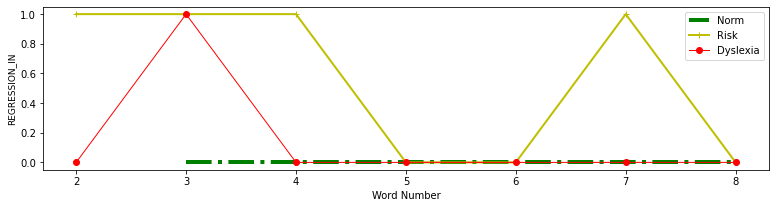

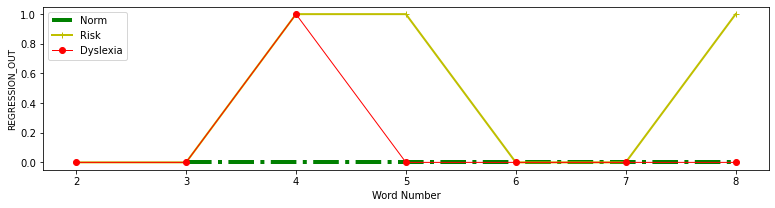

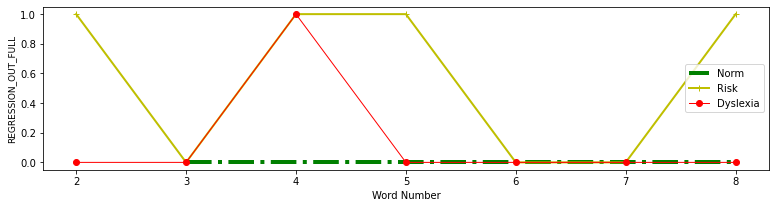

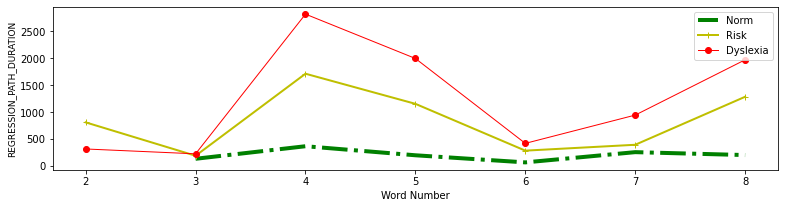

In [41]:


_ = plot_per_sentence_per_user(data, sentences[0], norm_users, risk_users, dyslexic_users, 1)



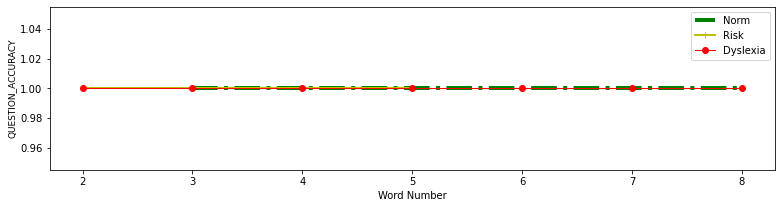

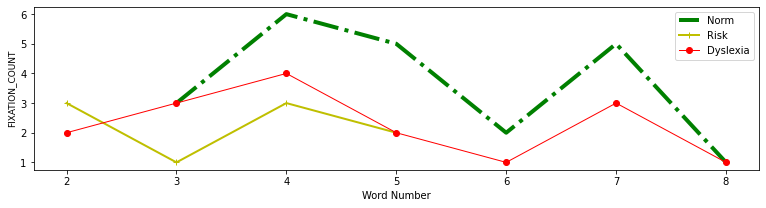

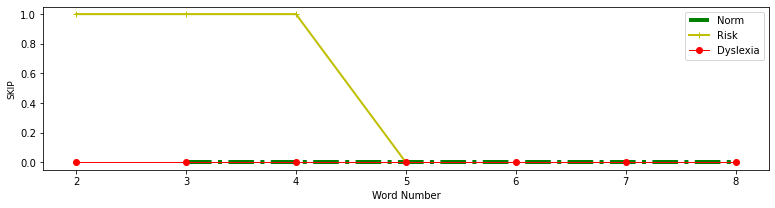

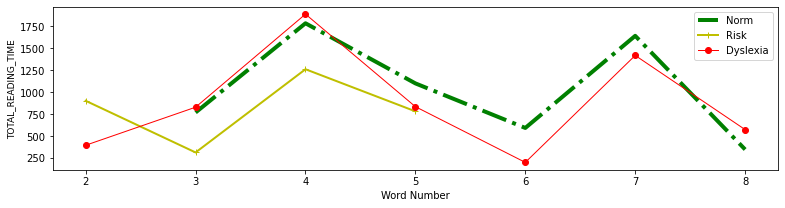

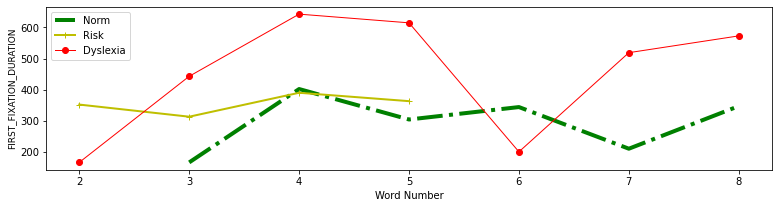

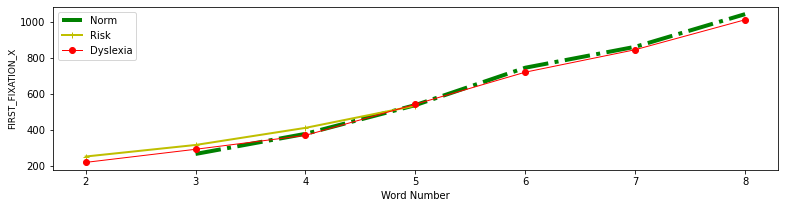

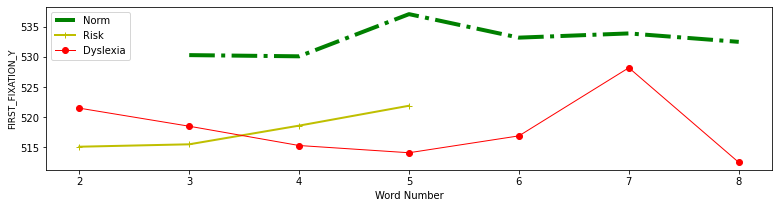

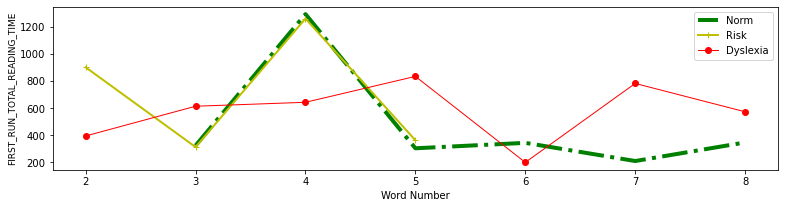

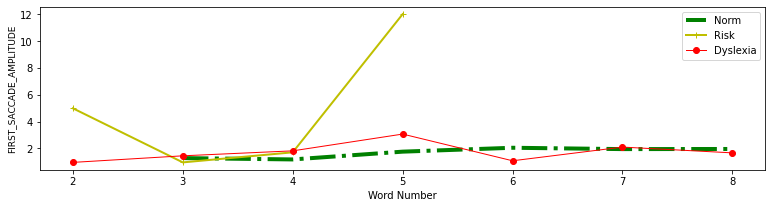

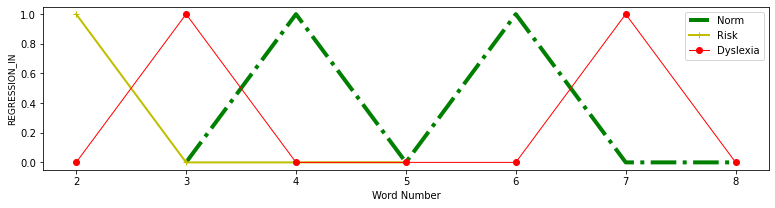

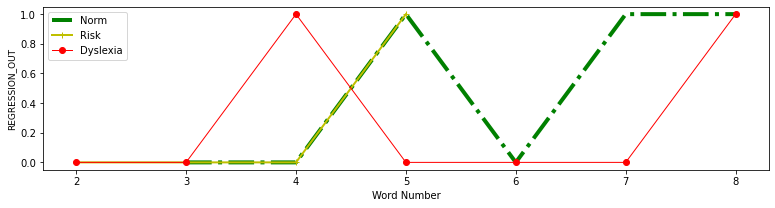

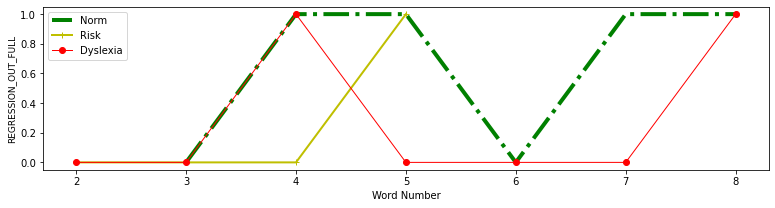

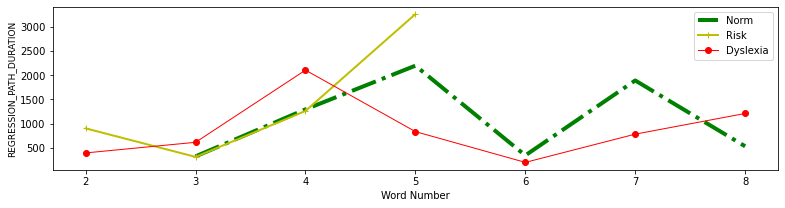

In [42]:


yn, yr, yd = plot_per_sentence_per_user(data, sentences[0], norm_users, risk_users, dyslexic_users, 10)



In [43]:


def plot_sevaral_sentences_per_user(data, sentences, norm_users, risk_users, dyslexic_users, index):
    
    N = min(len(norm_users), len(risk_users), len(dyslexic_users))
    markers = ["o", "s", "x", "+", "p", "*", "D", "v", "<", ",", ":"]
        
    if index > N:
        print("index is larger that number of at risk or dyslexic users")        
    assert not index > N
    

    features = list(data.columns)[4:]
        
    yn, yr, yd = [], [], []
    xn, xr, xd = [], [], []
    
    for sentence in sentences:
        
        _yn  = data.loc[(data["Sentence_ID"] == sentence) &
                      (data["SubjectID"] == norm_users[index])
                     ]
        yn.append(_yn)
        xn.append(_yn["Word_Number"])
        
        _yr = data.loc[(data["Sentence_ID"] == sentence) & 
                      (data["SubjectID"] == risk_users[index])
                     ]
        
        yr.append(_yr)
        xr.append(_yr["Word_Number"])
        
        _yd = data.loc[(data["Sentence_ID"] == sentence) & 
                      (data["SubjectID"] == dyslexic_users[index])
                     ]
        yd.append(_yd)
        
        xd.append(_yd["Word_Number"])
    
    for f in features:
        fig = plt.figure(figsize=(15, 4))
        ax = fig.add_subplot(1, 1, 1)  # three datasets
        for i in range(len(xn)): 
            
            plt.plot(xn[i], yn[i][f],
                     color='g', 
                     linestyle=':',
                     marker=markers[i],
                     markerfacecolor='green',
                     markersize=5,
                     linewidth=3, 
                     # alpha=1.0,
                     label="Norm-"+str(i+1),
                    )
            
            plt.plot(xr[i], yr[i][f],
                     color="y",
                     linestyle='-.',
                     marker=markers[i],
                     markerfacecolor='yellow',
                     markersize=4,
                     linewidth=2, 
                     label="Risk-"+str(i+1),
                     # alpha=0.5,
                    )
            
            plt.plot(xd[i], yd[i][f],
                     color="r",
                     linestyle='-',
                     marker=markers[i],
                     markerfacecolor='red',
                     markersize=5,
                     label="Dyslexia-"+str(i+1),
                     linewidth=1,
                    )
            
            plt.xlabel("Word Number", fontsize=10)
            plt.ylabel(f, fontsize=9)

        plt.legend()

    plt.show()
    
    return yn, yr, yd






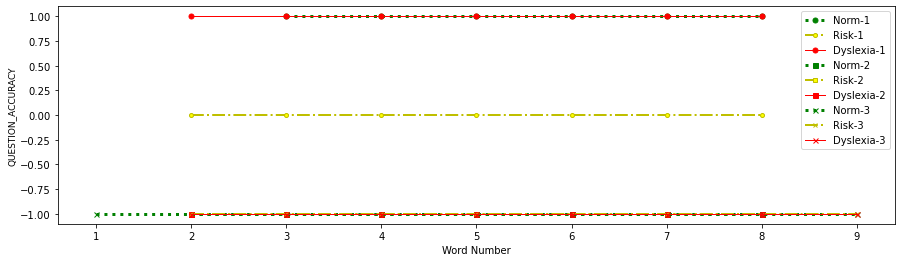

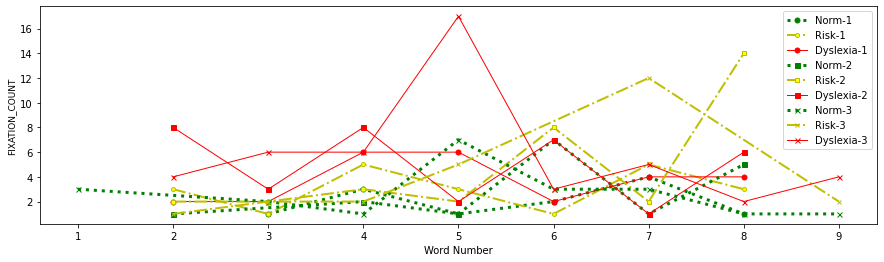

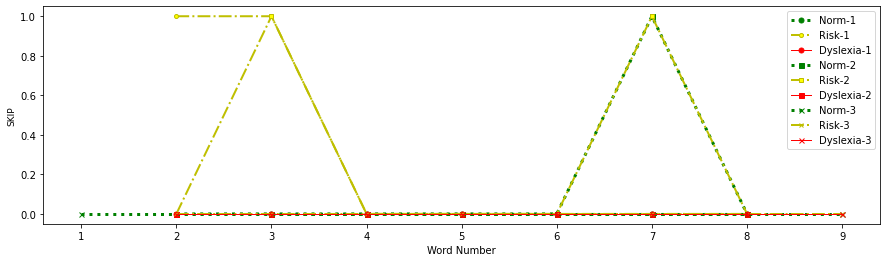

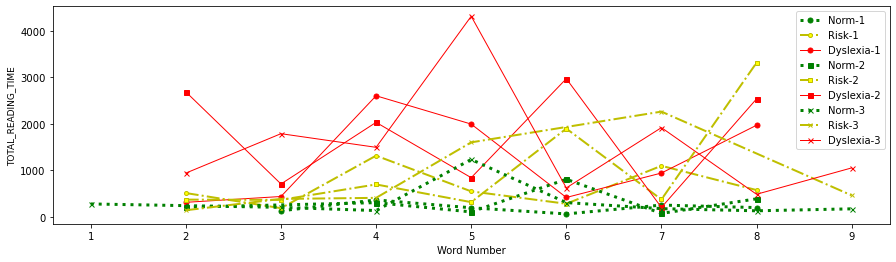

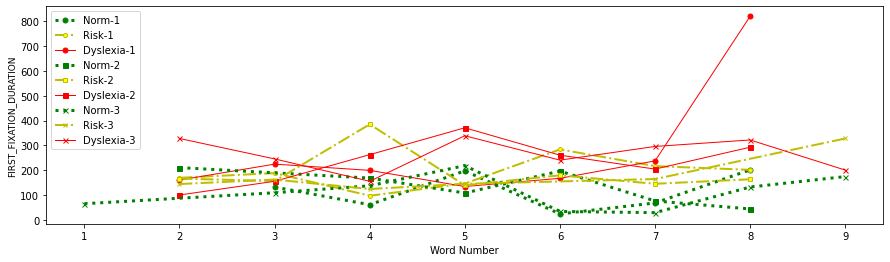

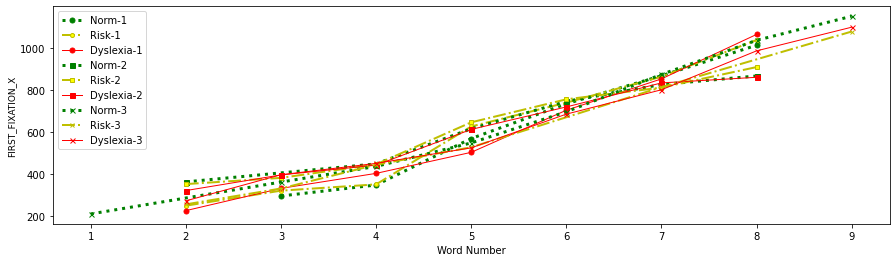

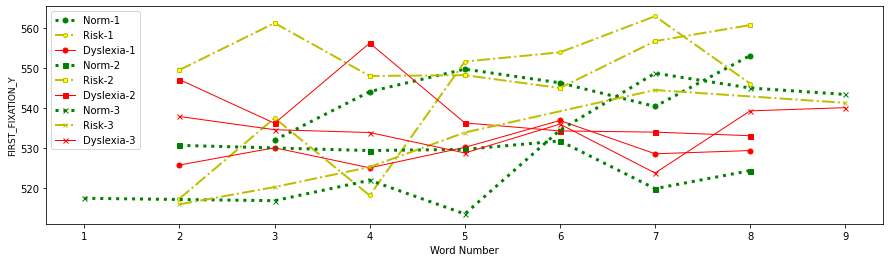

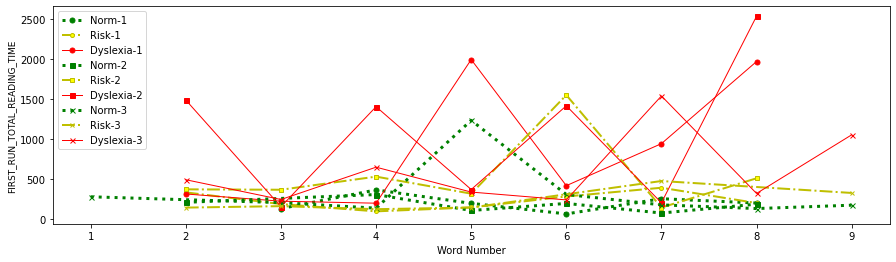

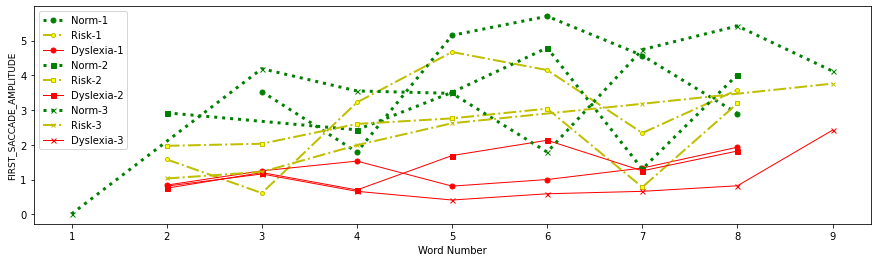

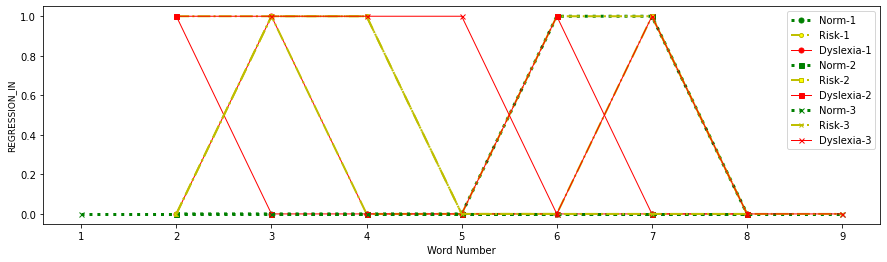

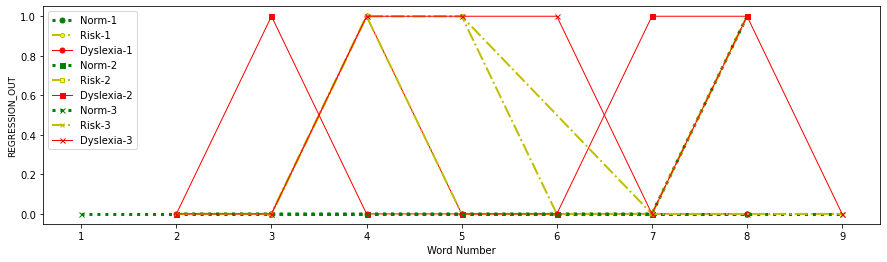

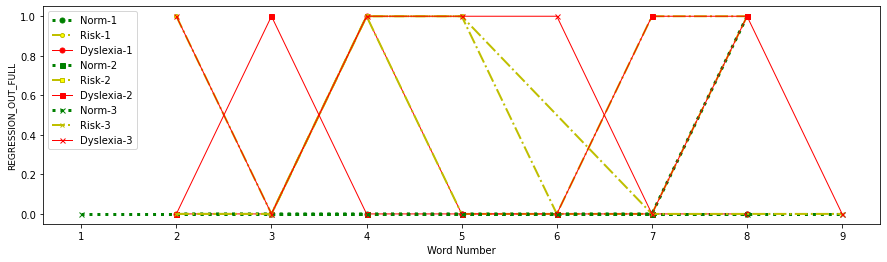

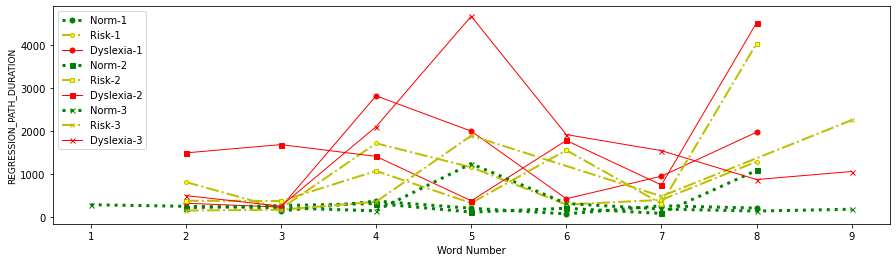

In [44]:


yn, yr, yd = plot_sevaral_sentences_per_user(data, sentences[:3],
                                             norm_users, risk_users, 
                                             dyslexic_users, 1)



In [45]:
yn[0]["Word_Number"]


40562    3
40563    4
40564    5
40565    6
40566    7
40567    8
Name: Word_Number, dtype: int64

In [46]:
sentences[0], norm_users[1]

(4, '108')

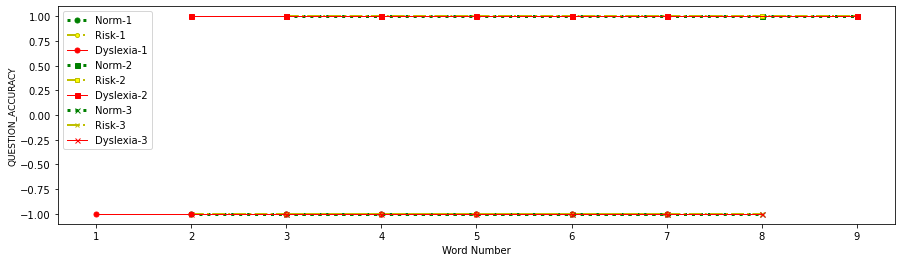

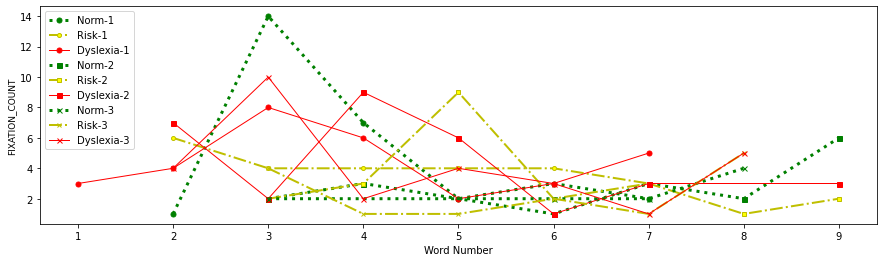

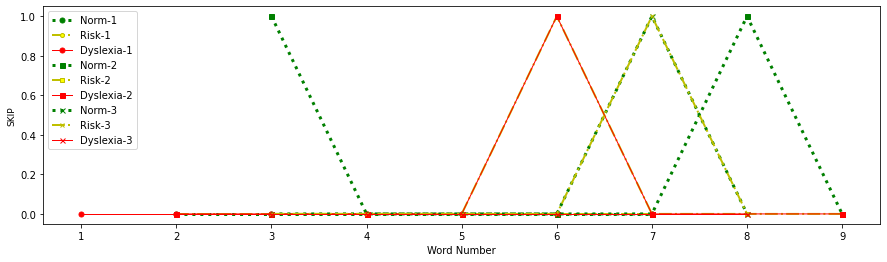

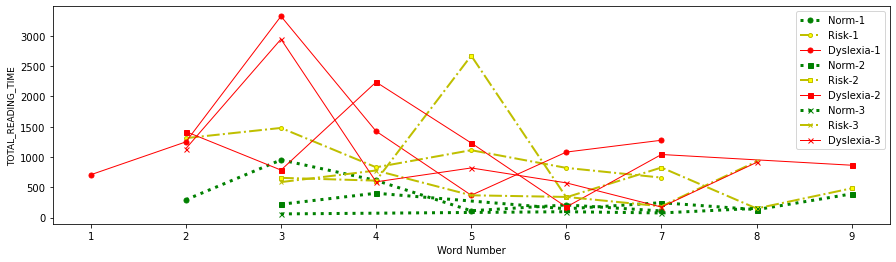

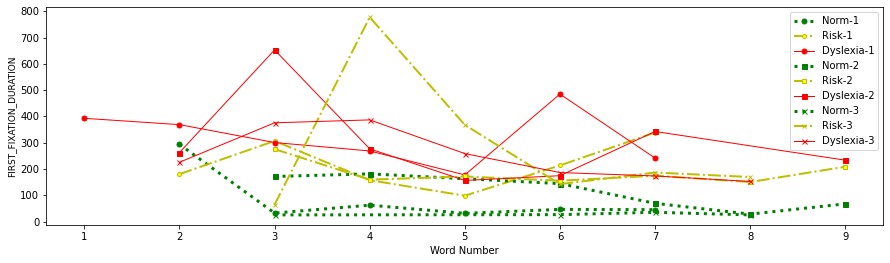

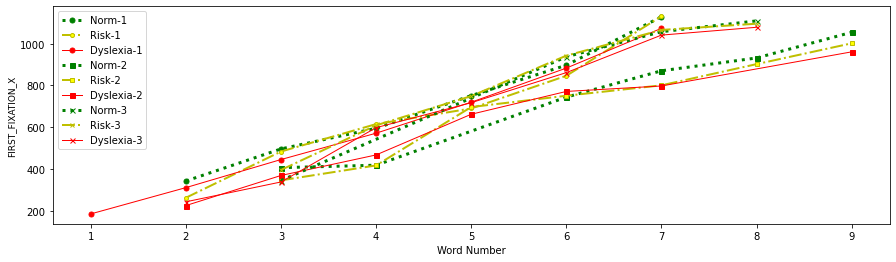

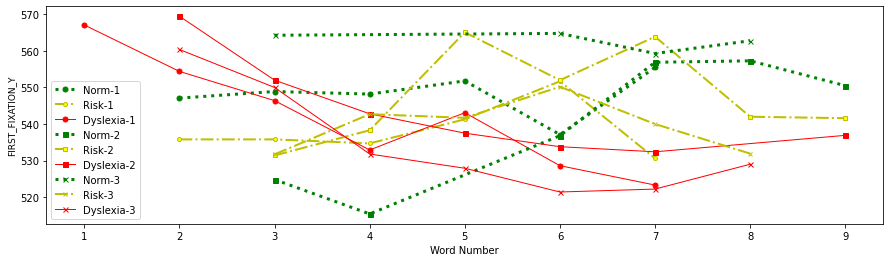

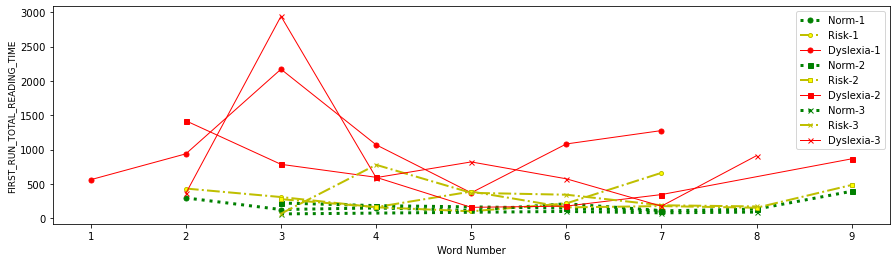

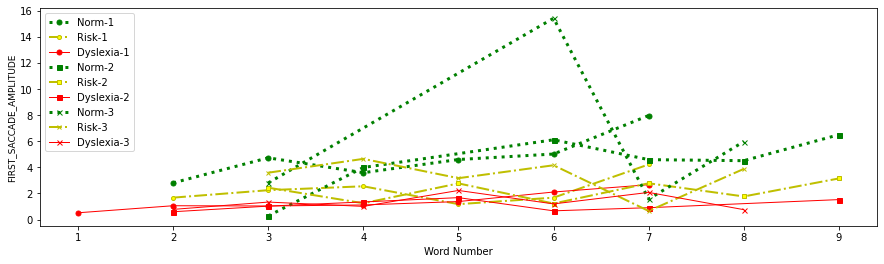

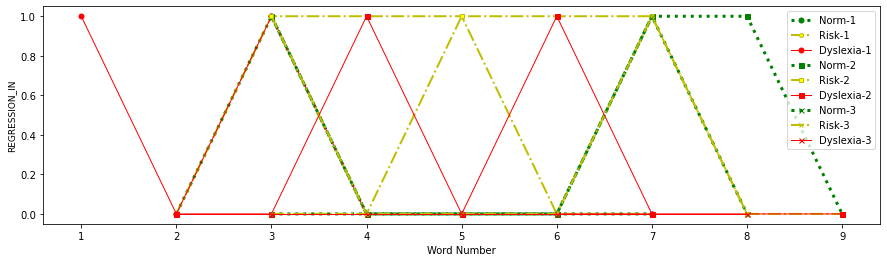

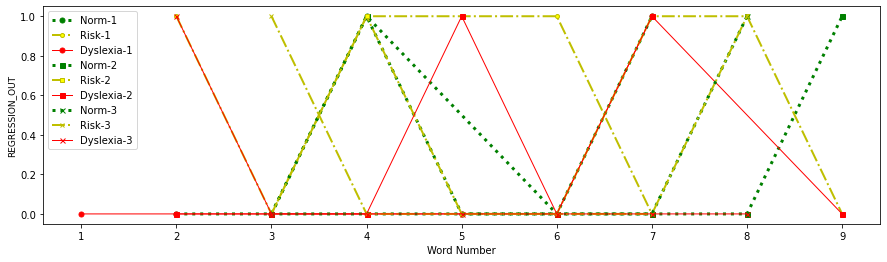

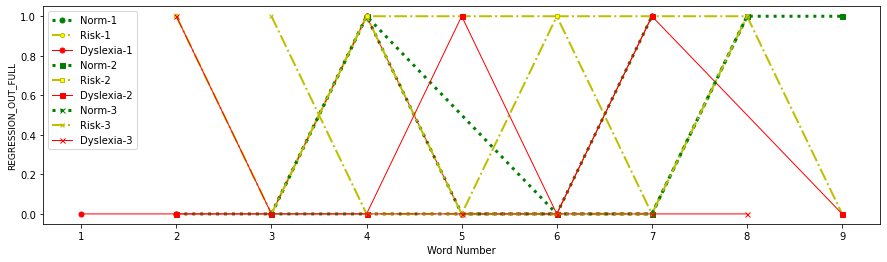

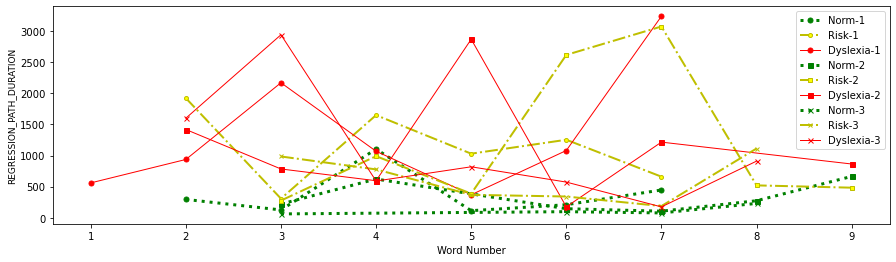

In [47]:

yn, yr, yd = plot_sevaral_sentences_per_user(data, sentences[15:18], 
                                             norm_users, risk_users, 
                                             dyslexic_users, 1)






#  Representatives: average and standard deviations


Since interpreting the above plots are difficult and time consuming, thus I decided to use means and std of the performance randomly selected users for the same set of sentences.






In [48]:


norm_means, norm_stds = [], []
risk_means, risk_stds = [], []
dyslexia_means, dyslexia_stds = [], []

for sentence in sentences:
    yn = data.loc[
        (data["Sentence_ID"] == sentence) &
        (data["SubjectID"].isin(norm_users))
    ]

    norm_means.append(yn.iloc[:, 4:].mean(axis=0))
    norm_stds.append(yn.iloc[:, 4:].std(axis=0))
    
    yr = data.loc[
        (data["Sentence_ID"] == sentence) &
        (data["SubjectID"].isin(risk_users))
    ]
    
    risk_means.append(yr.iloc[:, 4:].mean(axis=0))
    risk_stds.append(yr.iloc[:, 4:].std(axis=0))
    
    
    yd = data.loc[
        (data["Sentence_ID"] == sentence) &
        (data["SubjectID"].isin(dyslexic_users))
    ]
    dyslexia_means.append(yd.iloc[:, 4:].mean(axis=0))
    dyslexia_stds.append(yd.iloc[:, 4:].std(axis=0))
    
    

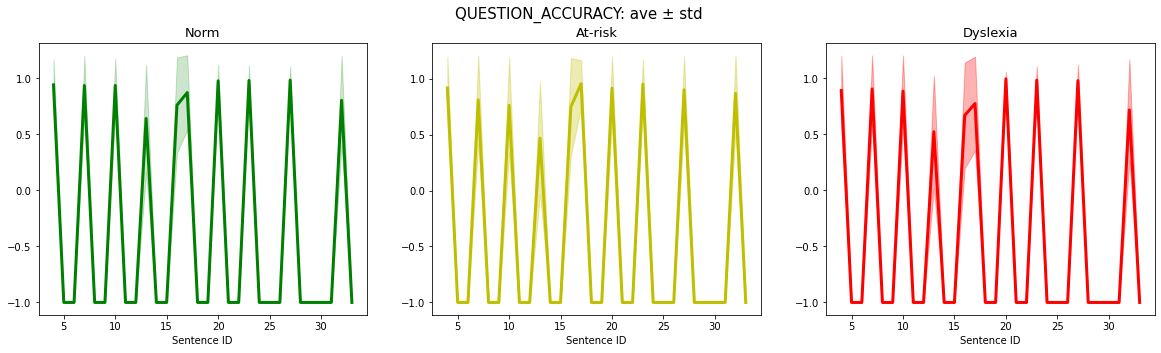

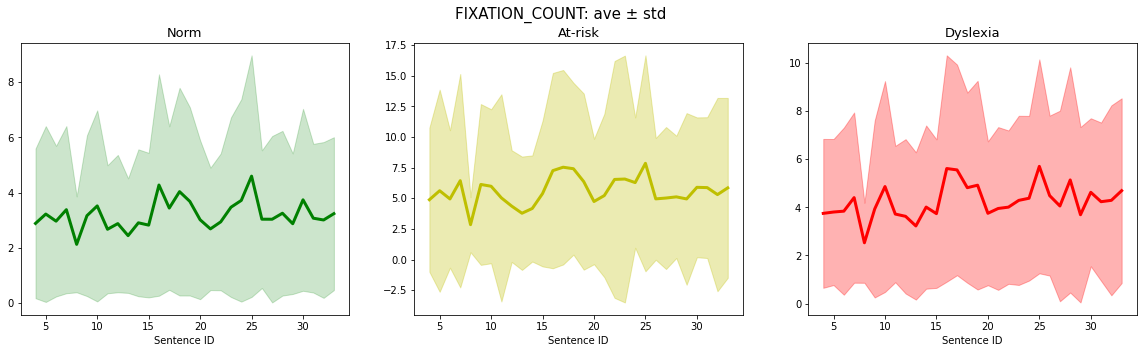

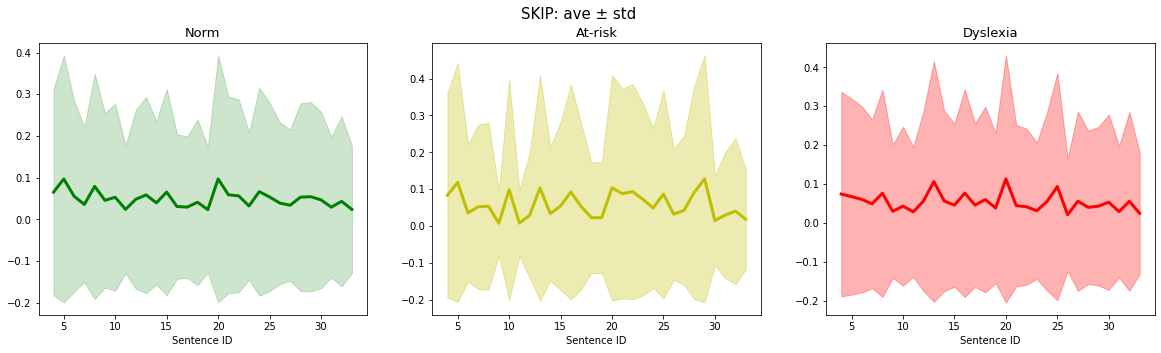

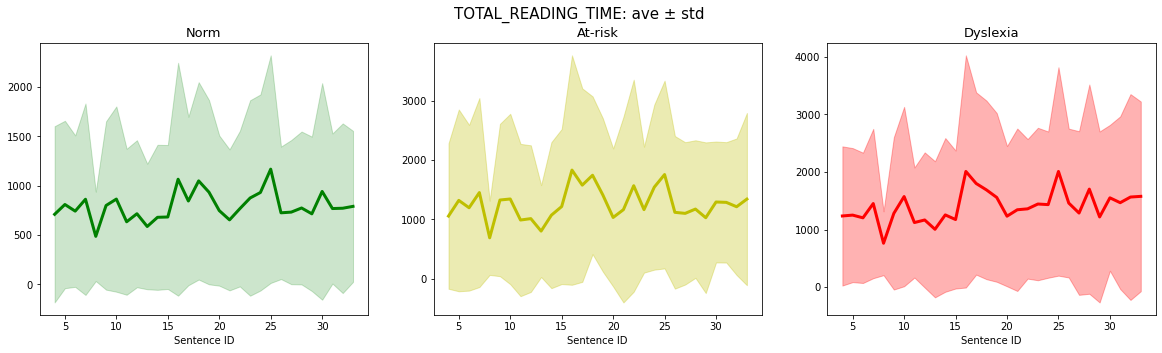

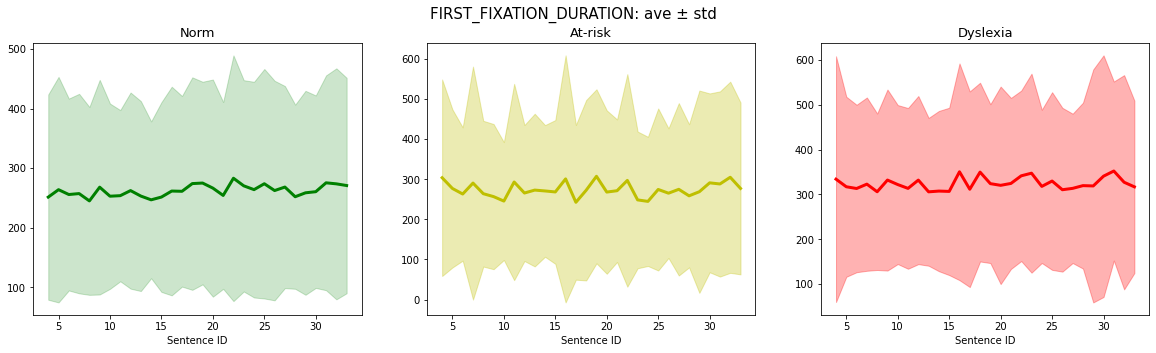

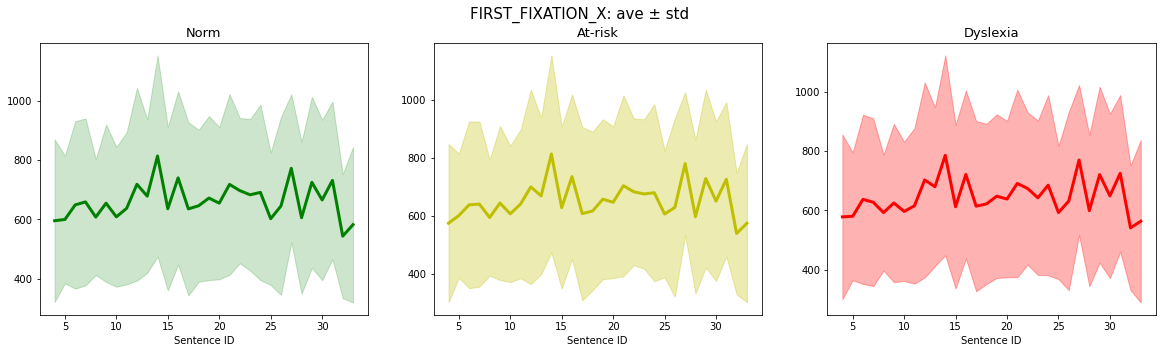

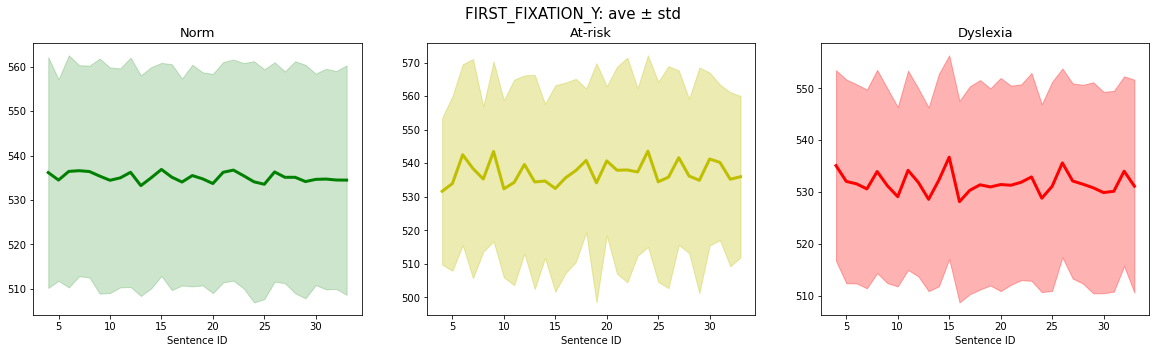

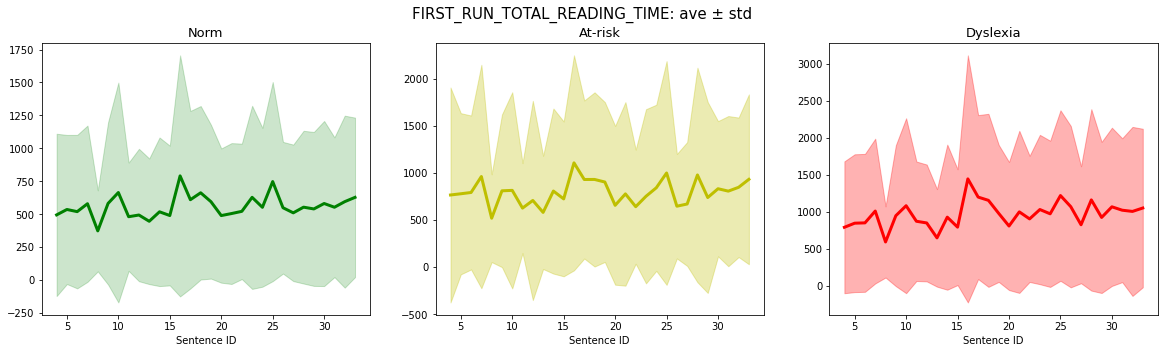

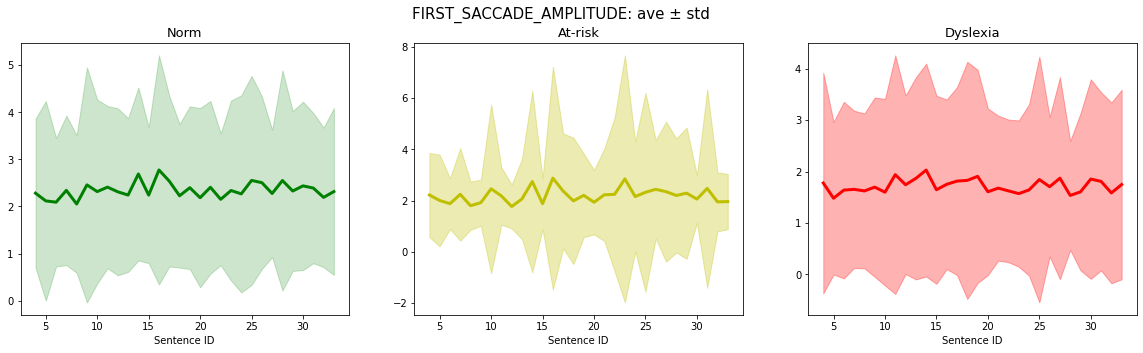

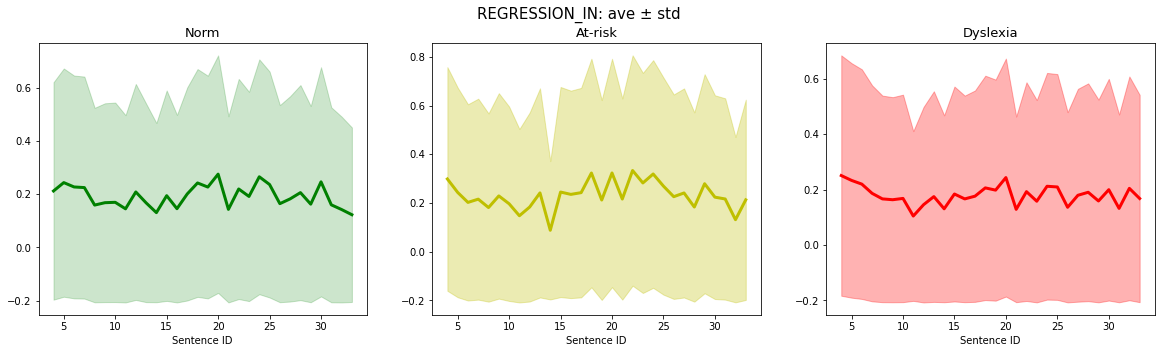

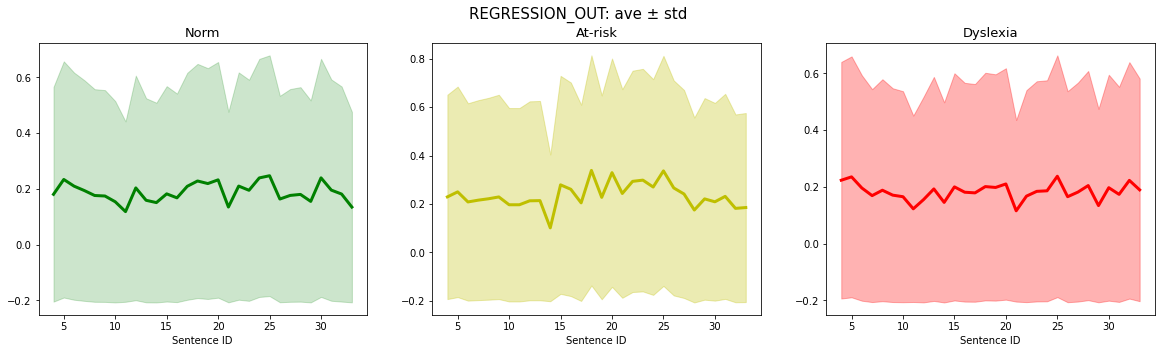

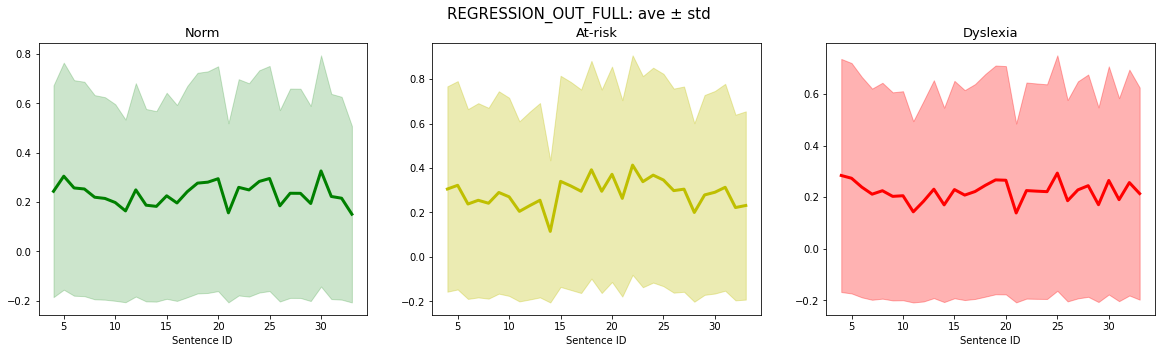

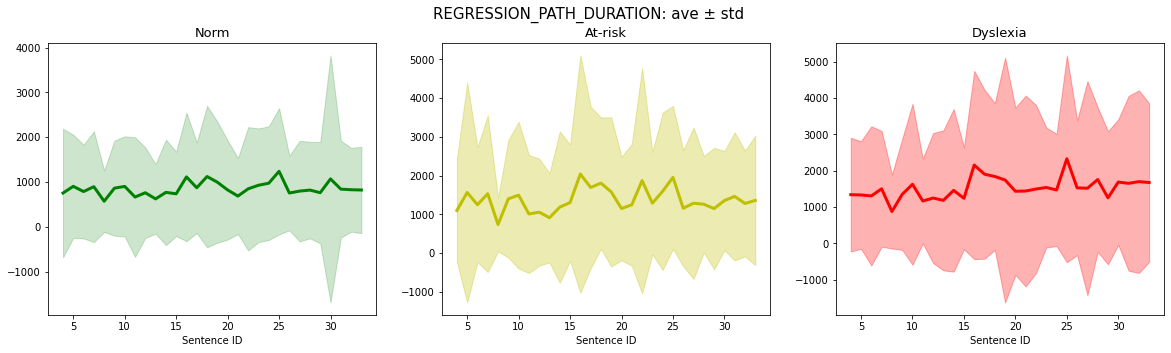

In [49]:


for f in norm_means[0].index:
    
    fig = plt.figure(figsize=(20, 5))
    ax = fig.add_subplot(1, 3, 1)
    x = range(4, 34)
    nm = pd.concat(norm_means, axis=1).T
    ns = pd.concat(norm_stds, axis=1).T
    ax.plot(x, 
            nm[f].values, 
            color="g", 
            linewidth=3
           )
    ax.fill_between(x, 
                    nm[f].values+ns[f].values, 
                    nm[f].values-ns[f].values,
                    alpha=0.2,
                    color="g",
                   )
    ax.set_title("Norm", fontsize=13, )
    plt.xlabel("Sentence ID")
    
    ax = fig.add_subplot(1, 3, 2)
    rm = pd.concat(risk_means, axis=1).T
    rs = pd.concat(risk_stds, axis=1).T
    ax.plot(x, rm[f].values, 
            color="y", linewidth=3
           )
    ax.fill_between(x, 
                    rm[f].values+rs[f].values, 
                    rm[f].values-rs[f].values,
                    alpha=0.3,
                    color="y",
                    )
    ax.set_title("At-risk", fontsize=13, )
    plt.xlabel("Sentence ID")
    
    ax = fig.add_subplot(1, 3, 3)
    dm = pd.concat(dyslexia_means, axis=1).T
    ds = pd.concat(dyslexia_stds, axis=1).T
    ax.plot(x, dm[f].values, color="r", linewidth=3)
    ax.fill_between(x, 
                    dm[f].values+ds[f].values, 
                    dm[f].values-ds[f].values,
                    alpha=0.3,
                    color="r",
                    )
    ax.set_title("Dyslexia", fontsize=13)
    plt.xlabel("Sentence ID")
    
    fig.suptitle(f + ": ave ± std", fontsize=15)

   
    plt.show()




### Conclusion:

- Question accuracy cannot be considered as a discriminating feature, as the participants from different groups may have similar results;


- "Fixation count", "total reading time," "first fixation duration," and "first run total reading time" in dyslexic and at-risk participants are significantly higher (however, the plots are very similar);


- Fixation along X coordinate does not differ in the three groups under investigation. However, the normal participants have shown relatively similar and horizontal line behavior, unlike the two remaining groups;


- To my surprise, the first saccade amplitude observed patterns in normal and dyslexic groups are similar, though, in the at-risk group, it depicts different behavior with a significantly lower standard deviation;


- Regression path duration has lower average and std values than the two other groups.



- **- QUESTION: what do the "dots" in the xlsx files represent? (they can appear everywhere at the beginning, middle, or even end of a sentence)**
